## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import Union
from numpy import ndarray
from pandas.core.arrays import ExtensionArray

## Load the dataset

In [2]:
# Load testing data
data = pd.read_csv('https://raw.githubusercontent.com/ktxdev/mind-matters/refs/heads/master/data/raw/train.csv')

## Initial Exploration
### Shape and Structure

In [3]:
print(data.shape)
data.head()

(140700, 20)


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


### Dropping Unwanted Features
- **id:** This is just a unique identifier for each person in the dataset, which does not contribute to predicting mental health outcomes.
- **Name:** This feature is not relevant to predicting depression and could introduce noise i.e it does not provide meaningful information for the model

In [4]:
data.drop(columns=['id', 'Name'], inplace=True)

### Rename Columns

In [5]:
data.rename(columns={'Have you ever had suicidal thoughts ?': 'Had Suicidal Thoughts?'}, inplace=True)

### Data Types

In [6]:
data.dtypes

Gender                               object
Age                                 float64
City                                 object
Working Professional or Student      object
Profession                           object
Academic Pressure                   float64
Work Pressure                       float64
CGPA                                float64
Study Satisfaction                  float64
Job Satisfaction                    float64
Sleep Duration                       object
Dietary Habits                       object
Degree                               object
Had Suicidal Thoughts?               object
Work/Study Hours                    float64
Financial Stress                    float64
Family History of Mental Illness     object
Depression                            int64
dtype: object

### Data Types Conversion

In [7]:
data['Study Satisfaction'] = data['Study Satisfaction'].astype('category')
data['Job Satisfaction'] = data['Job Satisfaction'].astype('category')
data['Academic Pressure'] = data['Academic Pressure'].astype('category')
data['Work Pressure'] = data['Work Pressure'].astype('category')
data['Financial Stress'] = data['Financial Stress'].astype('category')
data['Work/Study Hours'] = data['Work/Study Hours'].astype('category')
data['Depression'] = data['Depression'].astype('category')

### Checking for Missing Values

In [8]:
missing_values_cols = data.isnull()
print('Missing value counts:\n')
print(missing_values_cols.sum()[missing_values_cols.sum() > 0])
print('\nMissing value percentages:\n')
print(round((missing_values_cols.mean()[missing_values_cols.mean() > 0]) * 100, 2))

Missing value counts:

Profession             36630
Academic Pressure     112803
Work Pressure          27918
CGPA                  112802
Study Satisfaction    112803
Job Satisfaction       27910
Dietary Habits             4
Degree                     2
Financial Stress           4
dtype: int64

Missing value percentages:

Profession            26.03
Academic Pressure     80.17
Work Pressure         19.84
CGPA                  80.17
Study Satisfaction    80.17
Job Satisfaction      19.84
Dietary Habits         0.00
Degree                 0.00
Financial Stress       0.00
dtype: float64


### Basic Statistics
#### Continuous Variables

In [9]:
data.describe()

,Age,CGPA
count,140700.000000,27898.000000
mean,40.388621,7.658636
std,12.384099,1.464466
min,18.000000,5.030000
25%,29.000000,6.290000
50%,42.000000,7.770000
75%,51.000000,8.920000
max,60.000000,10.000000


**Discussion of results:**
- **Age:** The age attribute has a mean of 40.38 and a median of 42, indicating a slight left-skewness. This reflects that a larger propotion of individuals within the sample are closer to the middle age while younger individuals are fewer.
- **CGPA:** This attribute has a mean of 7.66 and a median of 7.77, indicating a slight left-skewness with a few lower CGPA values pulling the mean down. A larger proportion of students likely have CGPAs above the mean.

#### Categorical Variables

In [10]:
categorical_variables = ['Gender', 'City', 'Working Professional or Student', 'Study Satisfaction',
                         'Job Satisfaction', 'Academic Pressure', 'Work Pressure', 'Work/Study Hours',
                         'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Financial Stress',
                         'Had Suicidal Thoughts?', 'Family History of Mental Illness', 'Depression']
data[categorical_variables].describe()

,Gender,City,Working Professional or Student,Study Satisfaction,Job Satisfaction,Academic Pressure,Work Pressure,Work/Study Hours,Profession,Sleep Duration,Dietary Habits,Degree,Financial Stress,Had Suicidal Thoughts?,Family History of Mental Illness,Depression
count,140700,140700,140700,27897.0,112790.0,27897.0,112782.0,140700.0,104070,140700,140696,140698,140696.0,140700,140700,140700
unique,2,98,2,5.0,5.0,5.0,5.0,13.0,64,36,23,115,5.0,2,2,2
top,Male,Kalyan,Working Professional,4.0,2.0,3.0,2.0,10.0,Teacher,Less than 5 hours,Moderate,Class 12,2.0,No,No,0
freq,77464,6591,112799,6360.0,24783.0,7463.0,24373.0,14199.0,24906,38784,49705,14729,31451.0,71138,70758,115133


**Discussion of results:**
- **Gender:** This dataset has a higher proportion of males than females. This may indicate a gender imbalance, which could be relevant depending on the context of mental health, as gender can influence mental health outcomes and needs. Understanding the gender distribution is essential if analyzing gender-specific trends or if gender could be a factor in mental health outcomes.
- **City:** With 98 unique cities, the dataset represents a fairly wide geographic distribution, though "Kalyan" appears as the most common location. This could suggest regional biases or clustering, which may affect the generalizability of findings. Location can influence access to resources, socioeconomic factors, and stress levels, all of which are relevant to mental health analysis.
- **Working Professional or Student:** The data has a higher proportion of working professionals than students, which could indicate that work-related stressors are more prevalent in the sample. This information is crucial if analyzing mental health factors related to work-life balance, job satisfaction, or workplace pressures.
- **Study Satisfaction:** This attribute, with its high number of missing values, likely applies mostly to students rather than working professionals. Level 4 satisfaction being the most common suggests a moderate to high level of study satisfaction among students. This variable could be useful in examining how academic satisfaction impacts mental health among students.
- **Job Satisfaction:** Level 2 satisfaction as the most common indicates a generally low level of job satisfaction among working professionals in the dataset. Job satisfaction is an essential factor when analyzing work-related stress and its impact on mental health, and low satisfaction could correlate with higher stress and lower mental well-being.
- **Academic Pressure:** This attribute seems to apply mainly to students, and Level 3 being the most frequent suggests moderate academic pressure. Academic pressure is a critical factor in mental health analysis, especially for students, as high pressure can contribute to anxiety, stress, and burnout.
- **Work Pressure:** This indicates that work pressure is generally moderate to low, with Level 2 being the most common. Work pressure, like job satisfaction, can heavily influence mental health among working professionals. Lower work pressure might mitigate stress, but if paired with low job satisfaction, it could reflect unfulfilling or frustrating job conditions.
- **Work/Study Hours:** The most common work/study duration is 10 hours, which is quite high and suggests a substantial workload for both students and professionals. Long work/study hours can be associated with high stress levels and reduced time for self-care or relaxation, potentially impacting mental health negatively.
- **Profession:** Teaching is the most common profession among respondents. The high number of missing values suggests that this attribute may be missing for students or those who didn’t specify their profession. Profession type can influence mental health due to factors like job stress, work-life balance, and job satisfaction levels specific to each profession.
- **Sleep Duration:** Many respondents report sleeping less than 5 hours, which is quite low and may indicate sleep deprivation. Insufficient sleep is a major factor in mental health, associated with issues like anxiety, depression, and cognitive impairment. This trend may signal a need for better work-life balance or stress management among respondents.
- **Dietary Habits:** The most common dietary habit is "Moderate," which likely suggests that most respondents follow a balanced but not overly strict or indulgent diet. Dietary habits are linked to mental health, as poor nutrition can exacerbate issues like stress and fatigue. This attribute provides insight into lifestyle factors that may influence overall well-being.
- **Degree:** "Class 12" being the most common degree might suggest that a significant portion of respondents are younger (possibly recent high school graduates) or that the sample includes a mix of education levels. Education level can correlate with mental health factors such as job opportunities, financial stability, and life satisfaction.
- **Financial Stress:** Level 2 financial stress being the most common suggests a moderate level of financial strain for many respondents. Financial stress is a well-known contributor to mental health issues, impacting stress, anxiety, and general well-being. This attribute is crucial for understanding socio-economic pressures in the dataset.
- **Had Suicidal Thoughts?:** This attribute indicates whether respondents have had suicidal thoughts, with "No" being the more common response. However, the presence of this question itself highlights that suicidal ideation is a concern in this dataset. The number of "Yes" responses (implied to be about half of the sample) suggests a significant proportion of individuals may have struggled with severe mental health challenges. This attribute is crucial for identifying individuals at high risk and understanding the prevalence of suicidal thoughts in this population.
- **Family History of Mental Illness:** This attribute indicates whether respondents have a family history of mental illness. Family history is a well-known risk factor for mental health issues, as genetic predispositions and environmental factors can contribute to mental health challenges. The nearly even distribution between "Yes" and "No" responses suggests that a considerable portion of the respondents may have inherited risk factors, which could influence their mental health and stress levels.
- **Depression:** This attribute indicates whether a respondent is considered to have depression, with "0" representing "No" (not experiencing depression) and "1" representing "Yes" (experiencing depression). The high frequency of "0" suggests that the majority of the recorded responses are from individuals who are not diagnosed with or reporting depression, though a substantial number of cases are still marked as "1" (indicating depression).

## Univariate Analysis
### Numerical Columns

In [11]:
def plot_histogram_and_boxplot(data: pd.DataFrame, column: str) -> None:
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot histogram
    sns.histplot(x=column, data=data, ax=ax1)
    # Plot boxplot
    sns.boxplot(x=data[column], data=data, ax=ax2)
    
    # Show the plot
    plt.show()

#### Age

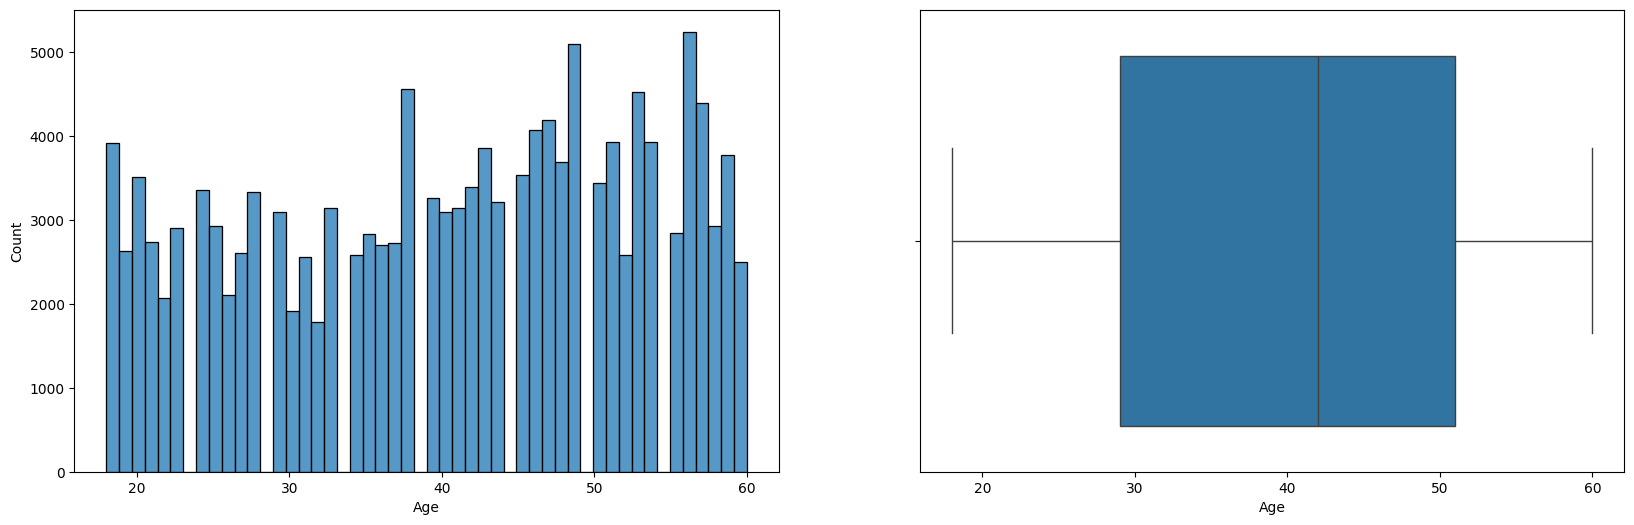

In [12]:
plot_histogram_and_boxplot(data, 'Age')

**Interpretation of results:**
- The age distribution appears fairly even, with no major outliers or skewed tendencies.
- The central tendency is around the middle of the range (close to the median), indicating that the data points are evenly spread out across the age groups, which could imply a diverse age group of individuals in the dataset.

#### CGPA

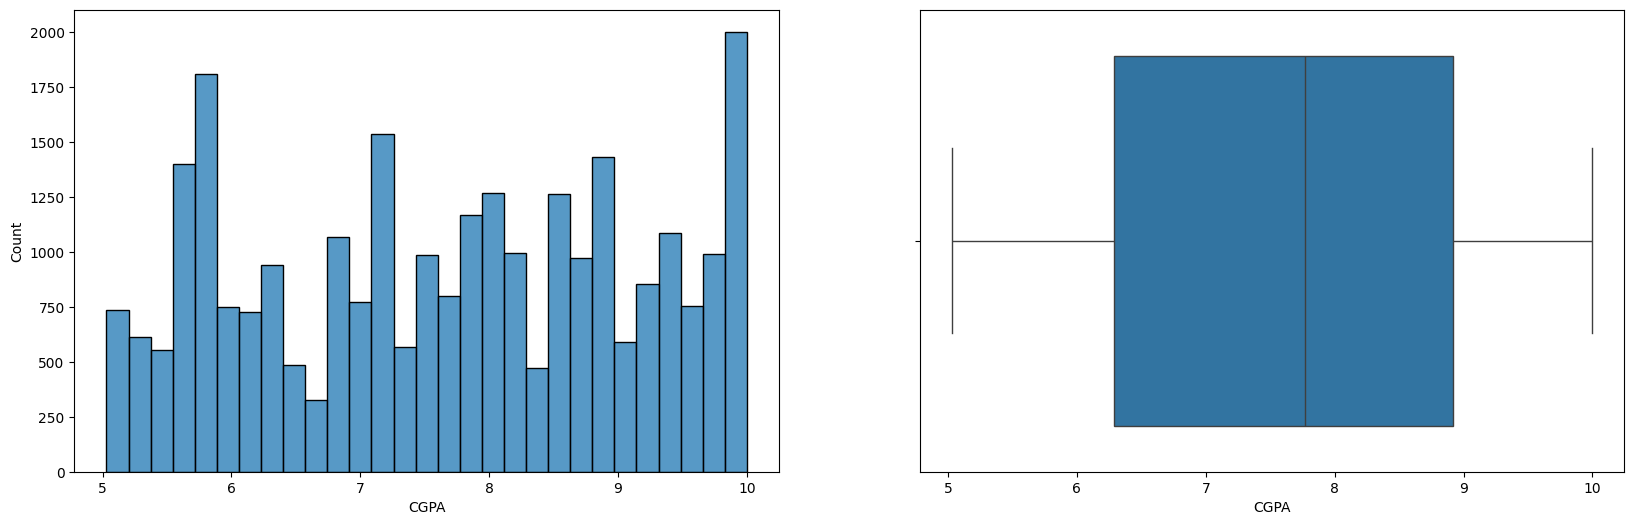

In [13]:
plot_histogram_and_boxplot(data, 'CGPA')

**Intepretation of results:**
- The data suggests that most individuals have a CGPA in the upper middle or higher range, with a slight tail towards lower values.
- The relatively high concentration of individuals with CGPA values closer to 10 implies a more academically successful group, with fewer people performing poorly in their academics.

### Categorical Columns

In [14]:
def plot_categorical_variable(data: pd.DataFrame, column: str) -> None:
    unique_values = data[column].unique()
    
    if len(unique_values) > 20:
        plot_categorical_variable_batched(data, unique_values, column)
    else:
        sns.countplot(data, x = column)
        plt.figure(figsize=(10, 6))
        plt.show()
    
def plot_categorical_variable_batched(data: pd.DataFrame, unique_values: Union[ExtensionArray, ndarray], column: str, batch_size: int = 20):
    # Define the number of values per batch
    num_batches = int(np.ceil(len(unique_values) / batch_size))
    
    # Loop through batches and plot two graphs side by side
    for i in range(0, num_batches, 2):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  # Create a 1x2 grid for two plots
        
        # Plot first batch
        if i < num_batches:
            batch_values = unique_values[i * batch_size : (i + 1) * batch_size]
            batch_data = data[data[column].isin(batch_values)]
            sns.countplot(data=batch_data, x=column, ax=ax1)
            ax1.set_title(f'Count Plot for {column} - Batch {i + 1}')
            ax1.tick_params(axis='x', rotation=90)
    
        # Plot second batch (if it exists)
        if i + 1 < num_batches:
            batch_values = unique_values[(i + 1) * batch_size : (i + 2) * batch_size]
            batch_data = data[data[column].isin(batch_values)]
            sns.countplot(data=batch_data, x=column, ax=ax2)
            ax2.set_title(f'Count Plot for {column} - Batch {i + 2}')
            ax2.tick_params(axis='x', rotation=90)
        
        plt.tight_layout()  # Adjust layout to prevent overlap
        plt.show()

#### Gender

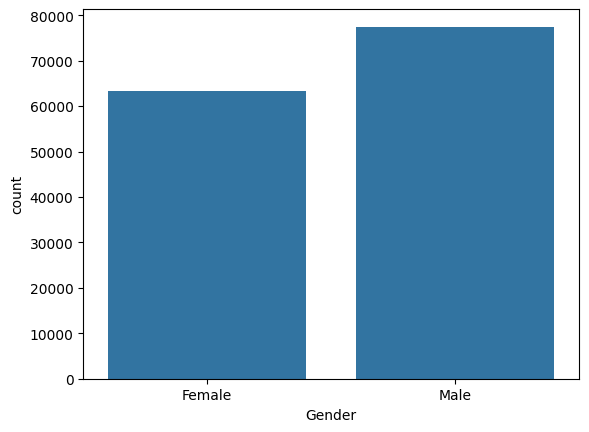

<Figure size 1000x600 with 0 Axes>

In [15]:
plot_categorical_variable(data, 'Gender')

**Interpretation of results:**
- The count for Female is slightly higher than Male, with both categories having over 60,000 observations.
- The bars indicate that the dataset is almost balanced in terms of gender representation, with a small difference between the two groups.
- This suggests a relatively equal distribution of males and females in the dataset, which is important for ensuring that any analysis or modeling does not introduce gender bias due to uneven representation.

#### City

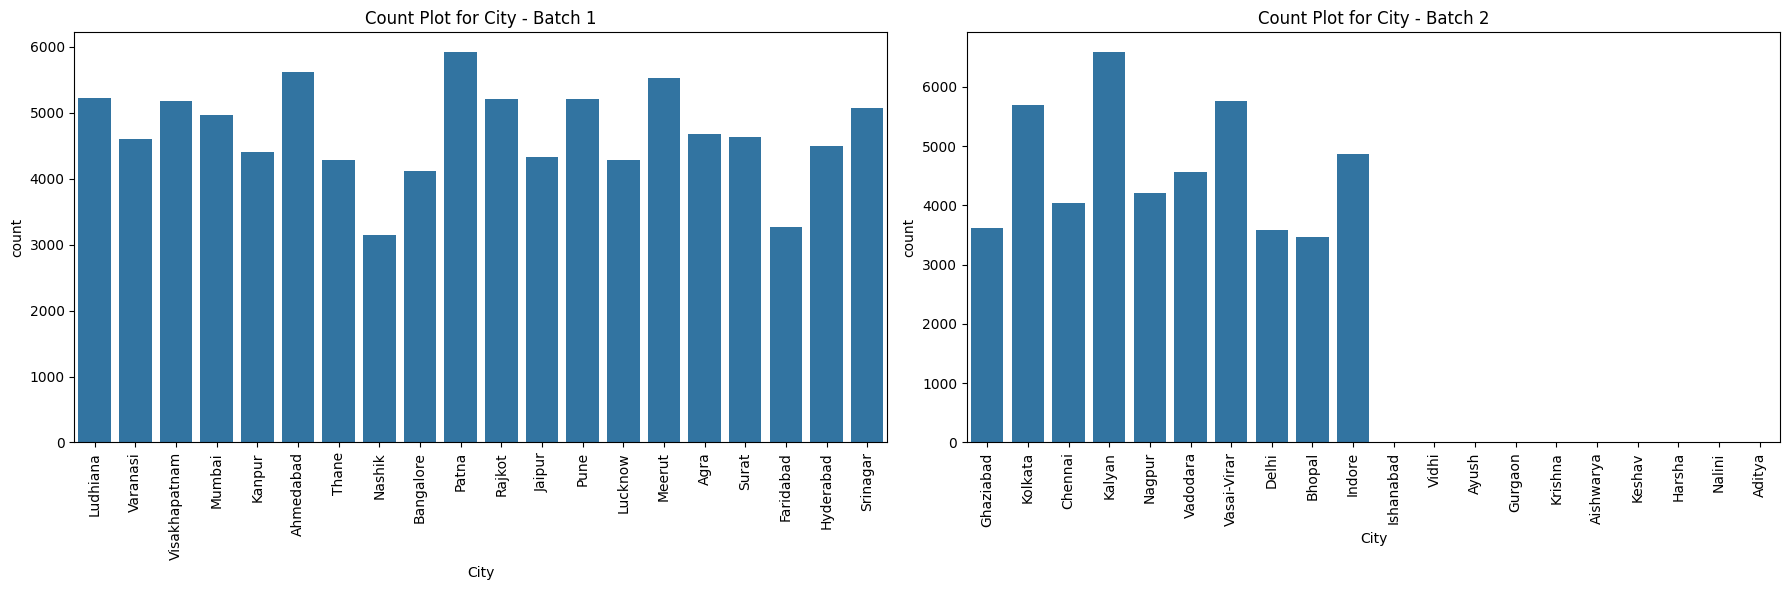

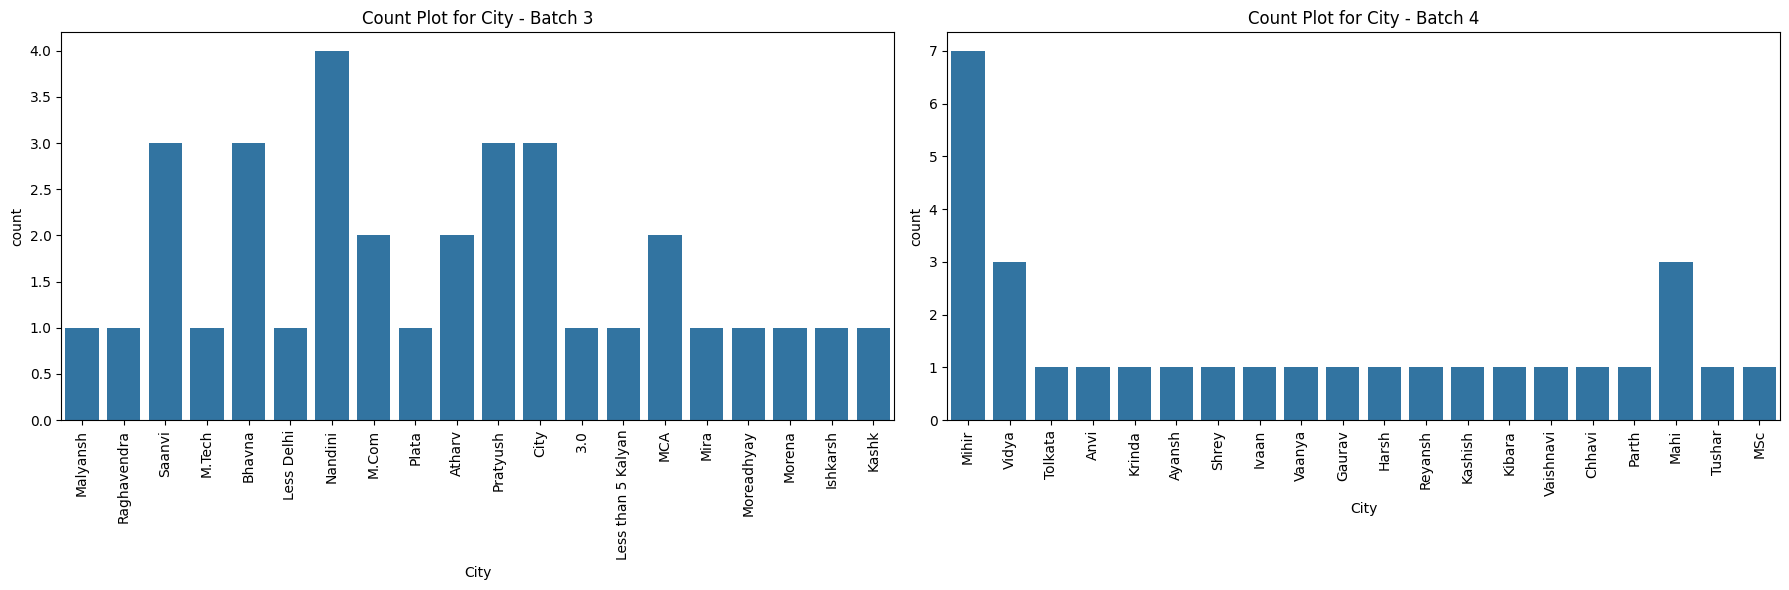

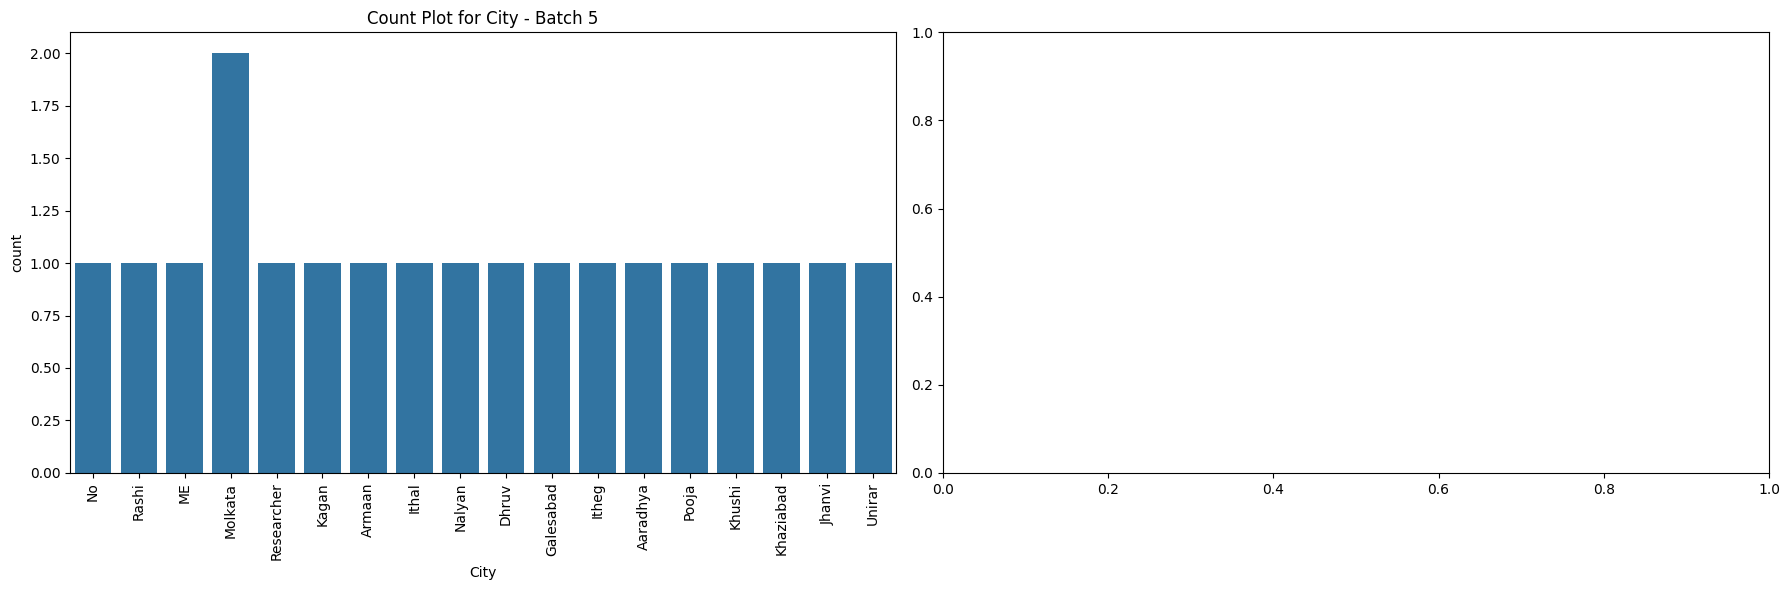

In [16]:
plot_categorical_variable(data, 'City')

**Interpretation of results:**
- Some cities have a more diverse range of counts across different batches (e.g., Delhi and Kolkata), while others are more concentrated in specific batches (e.g., Mokata).
- The presence of non-city entries in some batches indicates possible categorization or grouping beyond traditional cities, possibly indicating specific study areas or unique identifiers for individuals.

#### Working Professional or Student

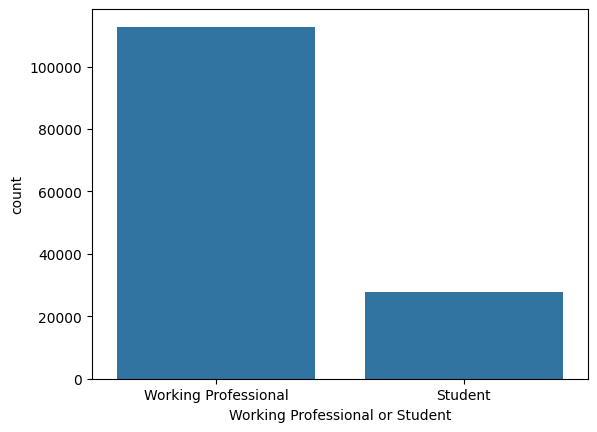

<Figure size 1000x600 with 0 Axes>

In [17]:
plot_categorical_variable(data, 'Working Professional or Student')

#### Working Professional or Student

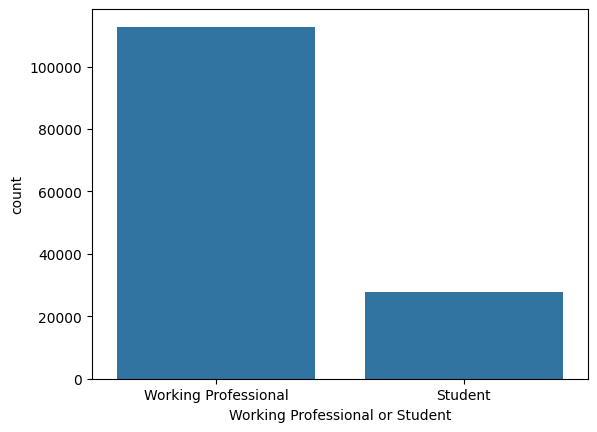

<Figure size 1000x600 with 0 Axes>

In [18]:
plot_categorical_variable(data, 'Working Professional or Student')

**Intepretation of results:**
- The majority of the dataset consists of Working Professionals, with a count significantly higher than that of students. The bar for Working Professionals is much taller, indicating that this group represents the bulk of the data.
- The Student category has a much smaller count, which is clearly outnumbered by the Working Professional category. This suggests that only a small proportion of the dataset is made up of students.
- The dataset is heavily skewed toward working professionals, with only a minority of entries being students. This could indicate that the focus of your dataset or study is more on professionals rather than students.
- Given the large difference in the number of entries between the two categories, it's essential to take into account that any analysis or model might be influenced by the dominance of working professionals.

#### Study Satisfaction

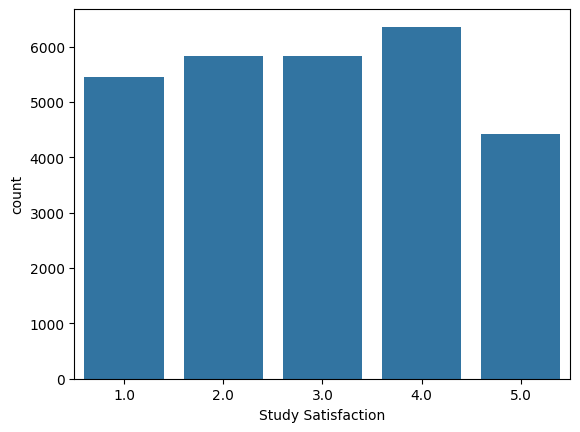

<Figure size 1000x600 with 0 Axes>

In [19]:
plot_categorical_variable(data, 'Study Satisfaction')

**Interpretation of results:**
- The distribution appears relatively balanced, with satisfaction ratings of 2, 3, and 4 having slightly higher counts compared to the other ratings (1 and 5).
- There seems to be a slight drop in count for the lowest (1) and highest (5) satisfaction ratings, suggesting that the majority of participants feel somewhat neutral to positive about their study experience, with fewer respondents giving extreme ratings (either very low or very high).
- The counts for ratings 2, 3, and 4 are fairly consistent, which indicates that most respondents fall into these middle satisfaction categories.
- The dataset suggests that most respondents are in the middle range of satisfaction, with fewer individuals reporting extreme levels (1 or 5). This could imply that overall, study satisfaction is moderate, with a slight lean towards a neutral-to-positive experience.
- The relatively even distribution across the mid-range values (2-4) shows that the responses are fairly spread out, without significant bias toward any particular satisfaction level.

#### Job Satisfaction

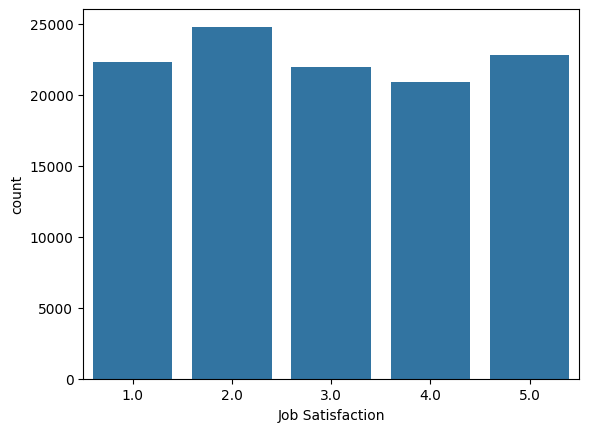

<Figure size 1000x600 with 0 Axes>

In [20]:
plot_categorical_variable(data, 'Job Satisfaction')

**Interpretation of results:**
- The distribution is fairly uniform across all satisfaction levels (1 to 5), with each rating having similar counts, all hovering around 20,000 to 25,000 responses. This indicates that the dataset is fairly balanced in terms of job satisfaction ratings.
- There are no extreme imbalances between the satisfaction levels, suggesting that individuals are relatively distributed across the spectrum of job satisfaction.
- While the counts are generally similar, there might be a slight tendency toward ratings of 2 and 3, as these bars seem a bit more prominent, though the differences are minimal.
- The data appears balanced in terms of job satisfaction, with no significant skew toward any particular level. This suggests that the workforce represented in the dataset has varying levels of job satisfaction, with no overwhelming trends toward high or low satisfaction.
- While there is no extreme concentration of ratings at the high (5) or low (1) ends, the relatively even distribution suggests that employees tend to feel moderately satisfied with their jobs. This could imply a broad range of experiences within the workforce.
- Since the distribution is nearly uniform, it shows that there are no major gaps in the responses, meaning that both satisfied and dissatisfied individuals are relatively represented.

#### Academic Pressure

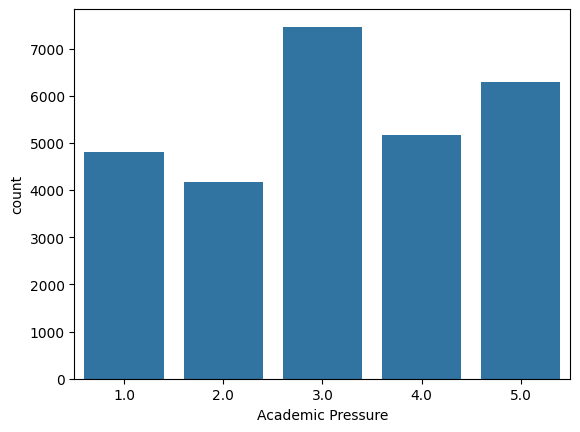

<Figure size 1000x600 with 0 Axes>

In [21]:
plot_categorical_variable(data, 'Academic Pressure')

**Interpretation of results:**
- The distribution shows that levels 3, 4, and 5 (indicating higher academic pressure) have noticeably higher counts compared to levels 1 and 2 (indicating lower academic pressure).
- Level 3 has the highest count, followed by levels 4 and 5, suggesting that many individuals report feeling moderate to high academic pressure.
- Most individuals in the dataset feel at least moderate academic pressure (3, 4, or 5), with the majority in the middle range (level 3). This indicates that academic pressure is a common experience among the group, with relatively fewer individuals reporting minimal pressure (1 or 2).
- The number of people reporting low academic pressure (levels 1 and 2) is comparatively low, suggesting that extreme lack of academic pressure is not as common in this group.
- The distribution isn't heavily skewed toward one extreme or the other, meaning that while academic pressure is fairly common, it isn't overwhelmingly felt by everyone in the same way.

#### Work Pressure

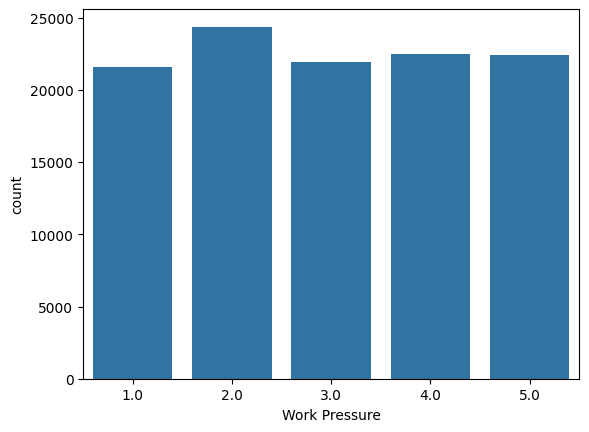

<Figure size 1000x600 with 0 Axes>

In [22]:
plot_categorical_variable(data, 'Work Pressure')

**Interpretation of results:**
- The distribution is fairly uniform, with all levels (1 to 5) having similar counts, ranging between 20,000 to 25,000 responses.
- This indicates that respondents are evenly distributed across all levels of work pressure, with no extreme bias toward low or high work pressure.
- The relatively even distribution suggests that work pressure is felt across a broad range of individuals in the dataset, with no dominant group reporting either very low or very high work pressure.
- Since the distribution doesn't show a concentration at the extremes (1 or 5), it suggests that people experience a moderate level of work pressure on average, with a good spread across all levels.
- There is no significant imbalance in the number of people reporting low (1) or high (5) work pressure, which could indicate that most individuals experience work pressure in a balanced way across the spectrum.

#### Profession

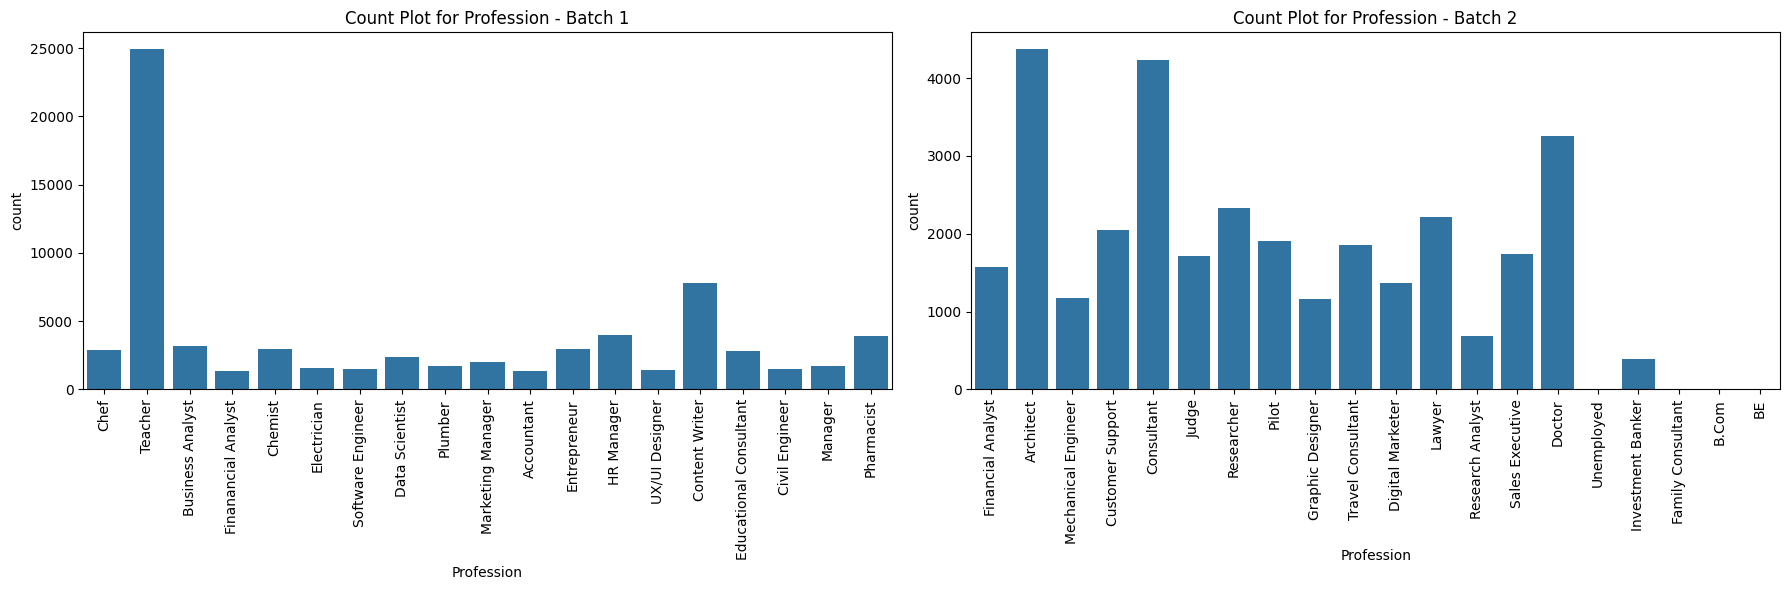

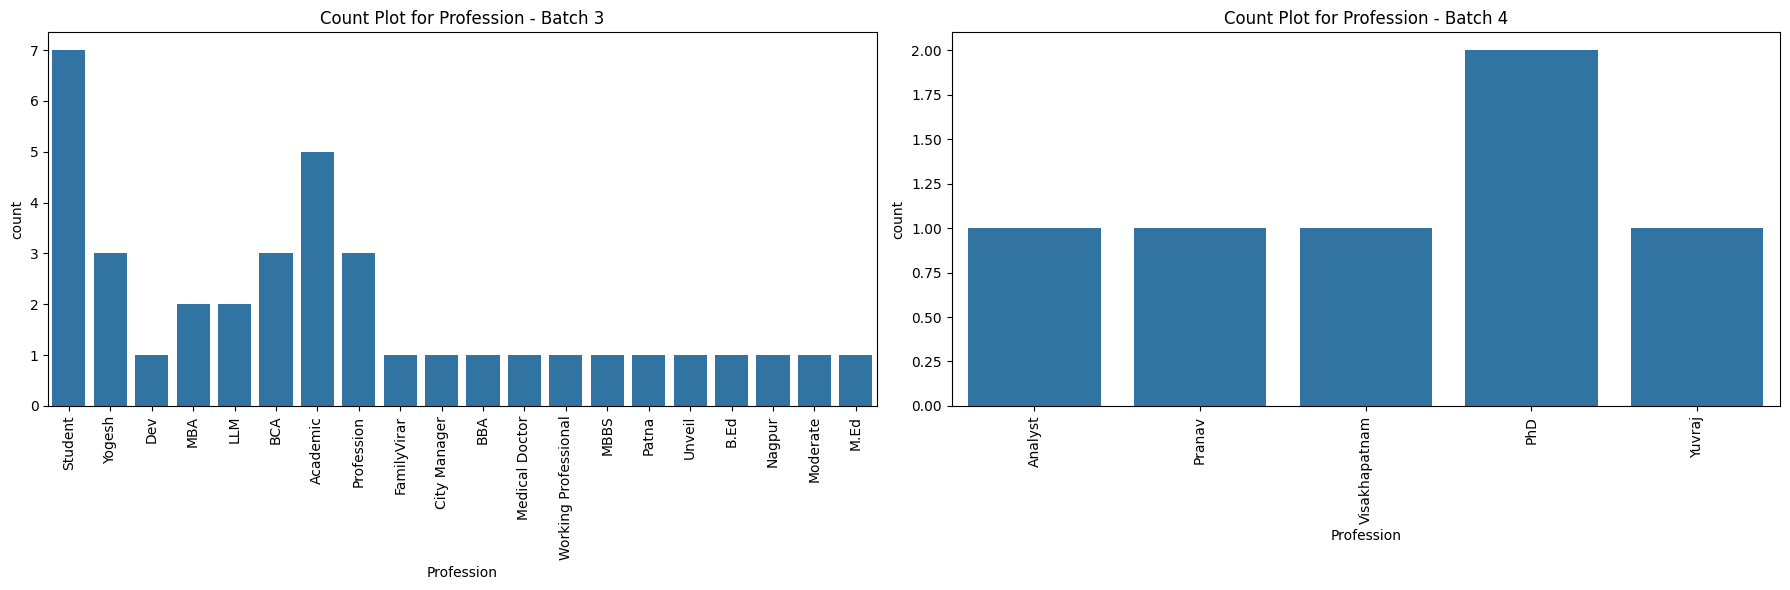

In [23]:
plot_categorical_variable(data, 'Profession')

**Interpretation of results:**
- Teacher and Content Writer appear as the most frequent professions, with a large proportion of individuals in these roles. These roles likely represent higher-level or more widely distributed professional categories.
- The data shows a diverse set of professions, from engineers and architects to more specialized roles like UX/UI Designer and Content Writer. This indicates that the dataset includes a wide variety of career paths.
- Consultant, Customer Support, and Researcher also show up in significant numbers, highlighting roles often found in tech, business, and academic sectors.
- Certain categories, such as Unemployed, BBA, MBA, City Manager, and Vishakhapatnam (potentially a location or individual), represent smaller or specialized groups within the dataset.
- Some categories, like Vishakhapatnam and Panav, appear to be either typos or data entry anomalies that may need clarification or cleaning.
- A large portion of the dataset represents roles in business (e.g., Business Analyst, Financial Analyst) and technology (e.g., Software Engineer, Data Scientist), indicating a focus on professional, technical, and analytical fields.
- The presence of both high-level managerial roles (e.g., Chief, Marketing Manager) and more technical roles (UX/UI Designer, Engineer) shows the broad spectrum of professions included in the dataset.
- There is also a notable representation of students, academics, and individuals in research roles, indicating that this dataset might include people from both professional and educational backgrounds.
- Some professions like Vishakhapatnam, Panav, and Medical Doctor seem out of place in the standard profession categories. These may need further investigation or cleaning to categorize them correctly.



#### Sleep Duration

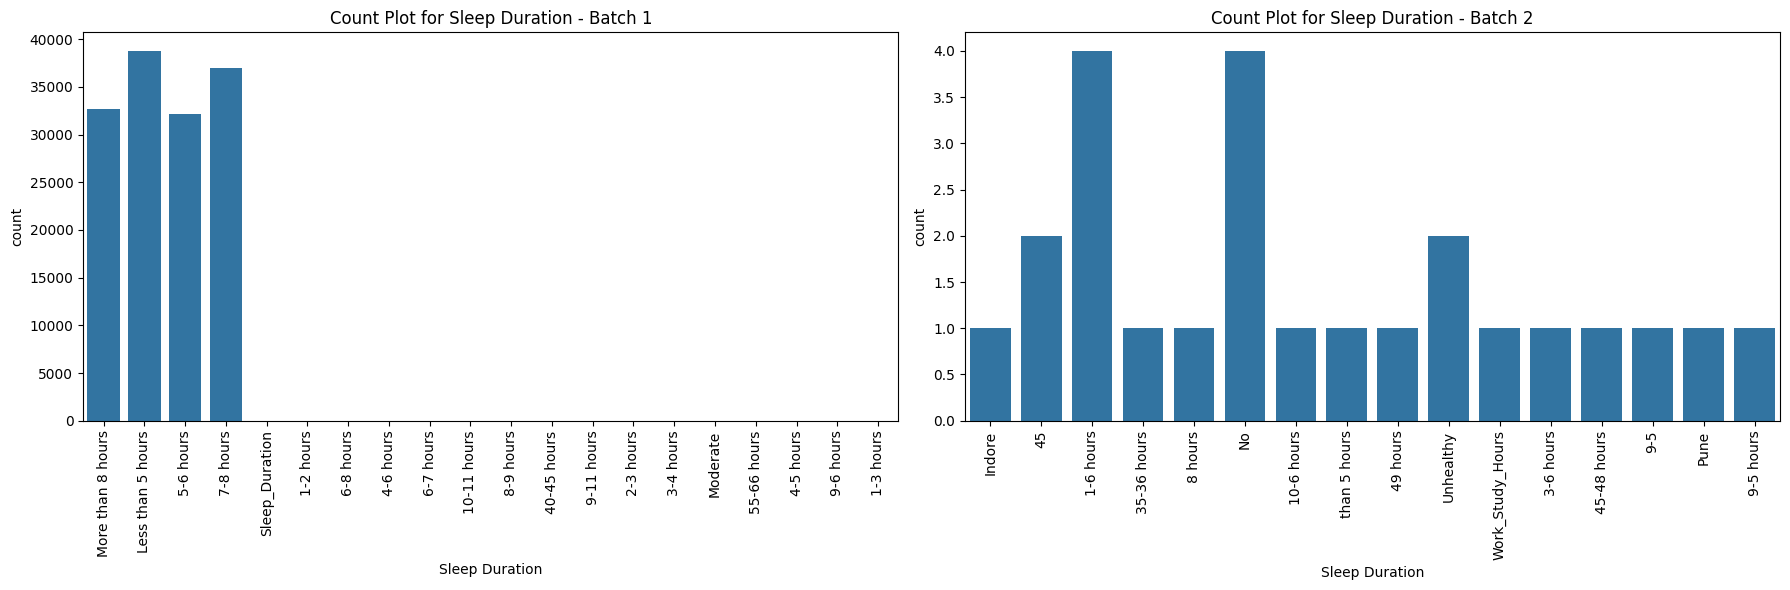

In [24]:
plot_categorical_variable(data, 'Sleep Duration')

**Interpretation of results:**
- 7-8 hours and "Less than 5 hours" are the most frequently reported sleep durations, with counts reaching over 35,000 for both categories.
- 5-6 hours and "More than 8 hours" are also commonly reported, suggesting that these are typical sleep durations for a large portion of the dataset.
- Categories like 1-2 hours, 6-7 hours, and 10-11 hours are less frequent, showing that extreme sleep durations (either very short or very long) are reported by fewer individuals.
- The "Sleep Duration" category likely represents missing or undefined data, which could be treated separately during analysis.
- Despite the presence of these anomalies, some of the usual sleep durations like "1-6 hours", "8 hours", "10-6 hours" and others appear in the plot.
- Categories like "45-48 hours" and "9-5 hours" might refer to work schedules rather than actual sleep durations, which should also be cleaned or redefined for better analysis.
- The majority of individuals report getting 7-8 hours or "Less than 5 hours" of sleep, which suggests a pattern of either longer sleep or very little sleep for most of the dataset.
- There are several entries that don't align with the typical sleep duration categories, such as "Indore", "45", and "Unhealthy". These appear to be data entry issues, so it would be important to clean the dataset to either remove or correct these values.

#### Dietary Habits

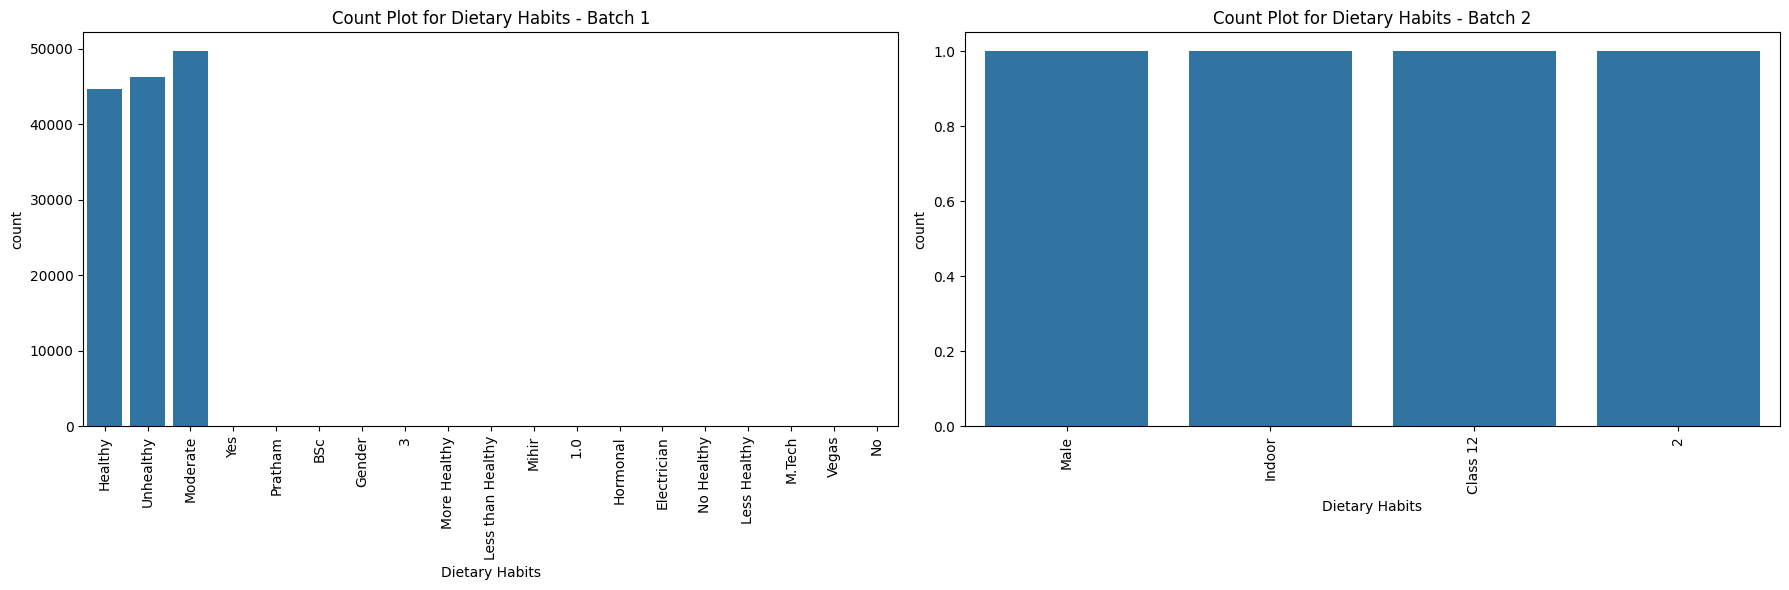

In [25]:
plot_categorical_variable(data, 'Dietary Habits')

**Interpretation of results:**
- The dominant categories for dietary habits are Healthy, Unhealthy, and Moderate, with Moderate and Unhealthy having the highest counts, each surpassing 40,000 responses. This suggests that most individuals in the dataset identify their dietary habits as either healthy or moderate, with fewer people reporting healthy habits.
- The frequency for healthy is also notable, but it has fewer counts than the extreme categories (Moderate and Unhealthy).
- There are some unexpected or less relevant entries such as "Yes," "Pratham," "BSc," and "M.Tech" that do not seem to fit the dietary habit categories. These could either represent data entry errors or categories that need to be cleaned up.

#### Degree

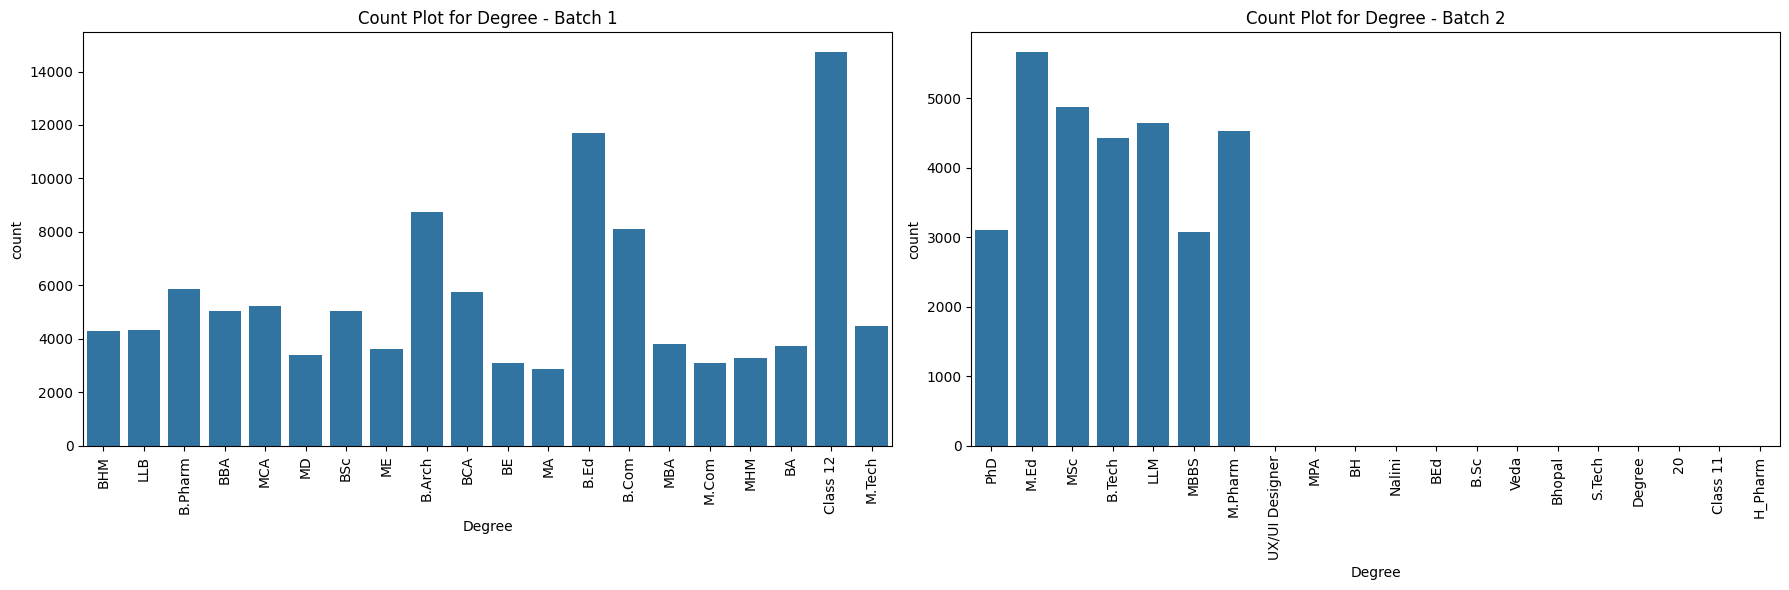

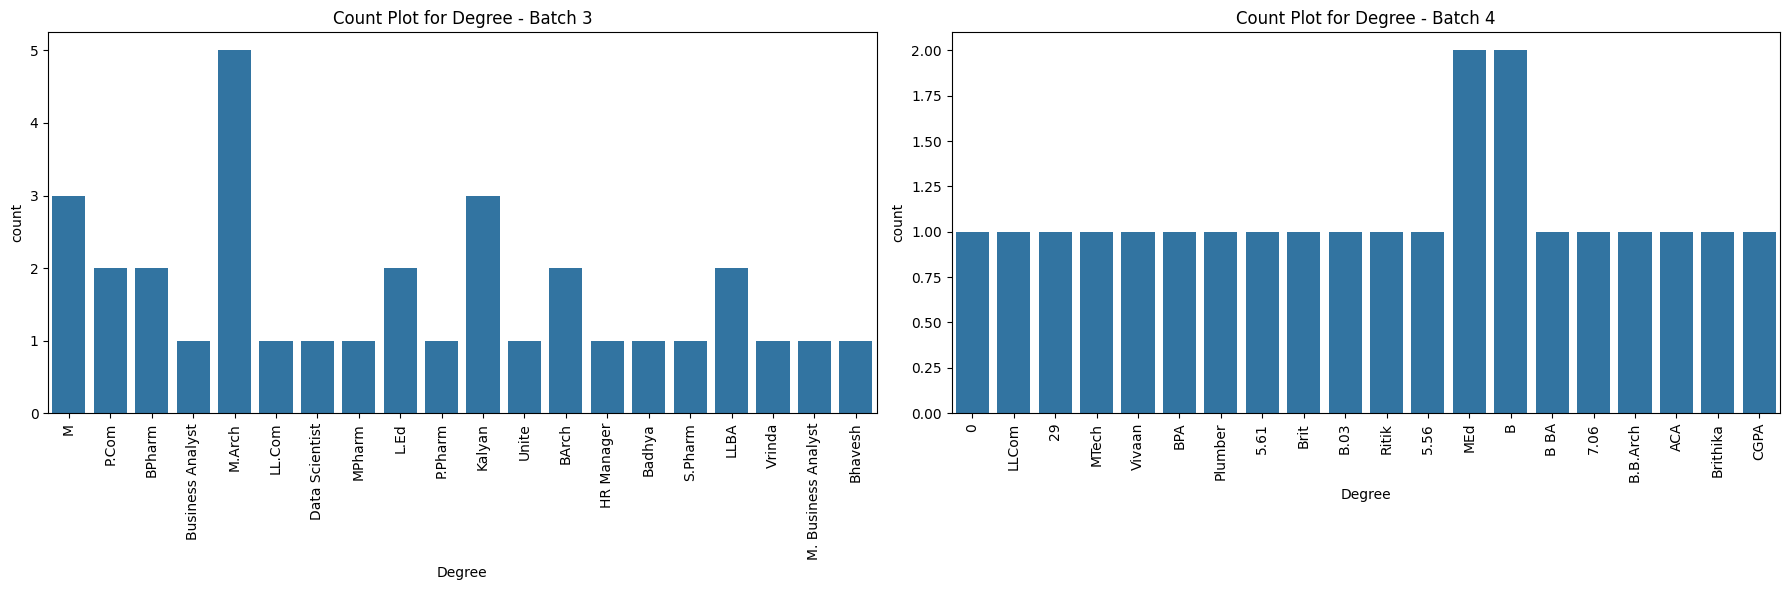

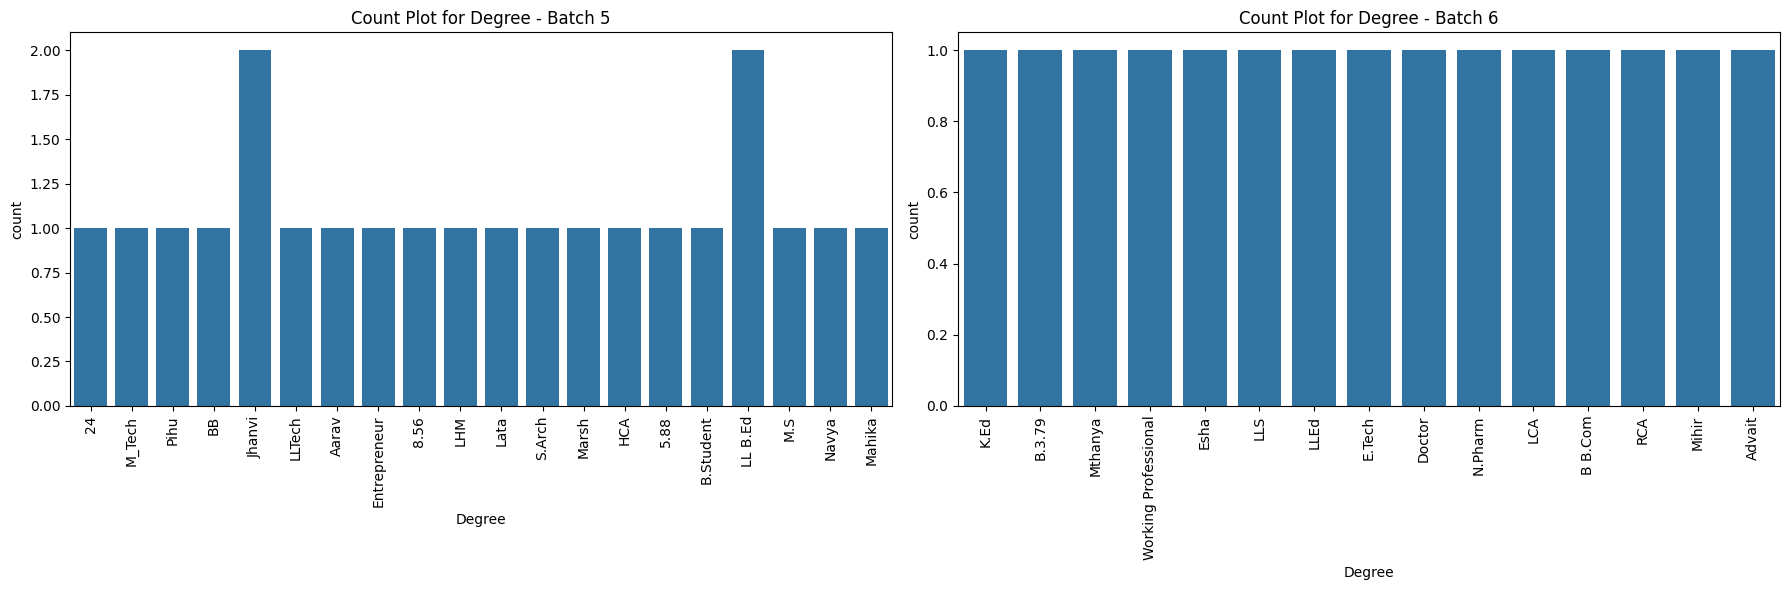

In [26]:
plot_categorical_variable(data, 'Degree')

**Interpretation of results:**
- Degrees such as B.Arch, B.Ed, and B.Com appear frequently, with counts ranging from 8,000 to a little over 14,000. These seem to be the most common degrees among the respondents.
- B.Pharm, BSc, and BCA also appear in substantial numbers.
- There are several other degrees like PhD, B.Tech, LL.M, and M.Pharm that are represented, though with slightly lower counts compared to the common degrees.
- Some entries such as Class 12 and Class 11 are included, which may need further validation or could represent individuals still in education or misclassified entries.
- There are entries like Business Analyst, M. Arch, Data Scientist, and HR Manager, which appear to be non-degree categories or job titles but may have been classified incorrectly under "Degree".
- Entries like 6.1, 55, Mihir, B.A (which is usually a standard degree but showing up as an anomalous entry), and other mixed values suggest either data errors or identifiers rather than valid degrees.
- The plot includes several categories with only 1 entry, such as M.S., S. Arch, and BBA. These could be outliers or errors in the data.
- The majority of respondents hold more common degrees such as MBA, B.Ed, and B.Com, which reflects a typical distribution of academic qualifications.
- Many unexpected entries (e.g., Class 12, Mihir, Bhopal, and Working Professional) point to potential data issues, misclassification, or improper entries that need to be addressed.
- Some entries seem more like job titles or professional roles (e.g., Business Analyst, Data Scientist) than actual academic degrees, suggesting possible misclassification in the dataset.

#### Financial Stress

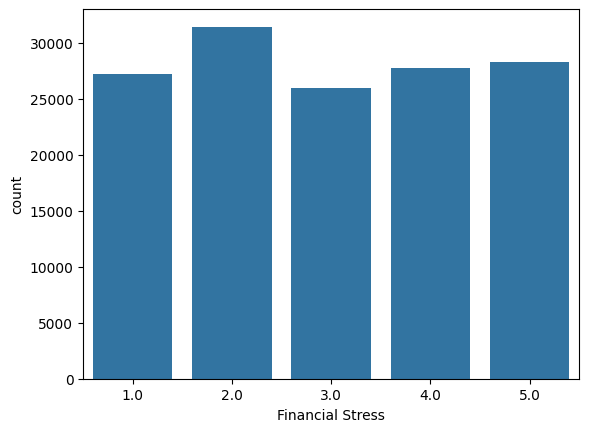

<Figure size 1000x600 with 0 Axes>

In [27]:
plot_categorical_variable(data, 'Financial Stress')

**Interpretation of results:**
- The distribution is fairly uniform, with all levels having similar counts ranging from 25,000 to slightly over 30,000.
- There is no extreme concentration at any specific level, suggesting that financial stress is felt across all levels, but it isn't overwhelmingly high for most individuals.
- The fairly even distribution suggests that financial stress is a common experience for a large portion of the dataset, but no single group is experiencing extremely high or low levels. The stress levels appear to be distributed evenly across all categories.
- The similar counts across the different levels of financial stress indicate that people in the dataset experience varying levels of stress, but with no significant skew toward either extremely low or high financial stress.

#### Had Suicidal Thoughts?

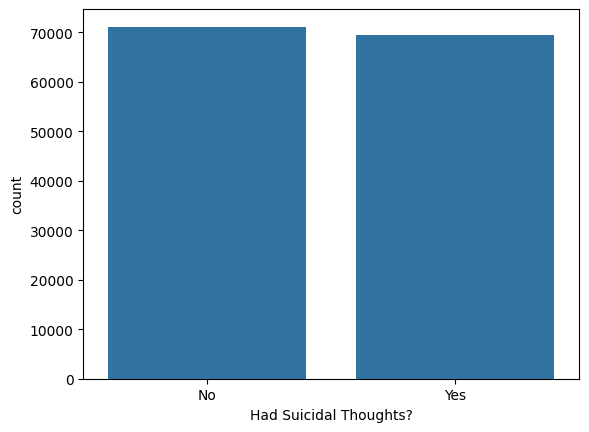

<Figure size 1000x600 with 0 Axes>

In [28]:
plot_categorical_variable(data, 'Had Suicidal Thoughts?')

**Interpretation of results:**
- The plot shows a near-equal distribution between the two categories, with 68,000+ responses in both the Yes and No categories.
- This suggests that a significant portion of the dataset has both individuals who have experienced suicidal thoughts and those who have not.
- The near-equal split between Yes and No responses indicates that a considerable proportion of the sample has reported experiencing suicidal thoughts. This highlights a potentially significant concern for mental health, with almost half the sample expressing this experience.

#### Family History of Mental Illness

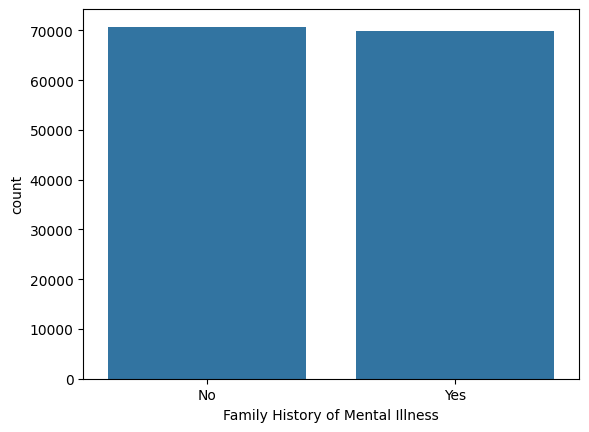

<Figure size 1000x600 with 0 Axes>

In [29]:
plot_categorical_variable(data, 'Family History of Mental Illness')

**Interpretation of results:**
- The plot shows a balanced distribution between the two categories, with both Yes and No responses having over 65,000 counts.
- This suggests that a significant portion of the dataset has both individuals with a family history of mental illness and those without.
- The near-equal split between Yes and No responses indicates that family history of mental illness is a significant factor for nearly half the individuals in the dataset.

#### Depression

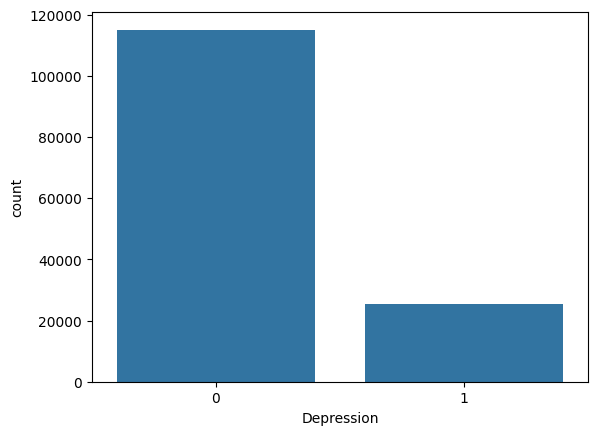

<Figure size 1000x600 with 0 Axes>

In [30]:
plot_categorical_variable(data, 'Depression')

**Interpretation of results:**
- The plot clearly shows a highly imbalanced distribution, with a very large count for No (0), which exceeds 100,000 responses.
- The Yes (1) category, indicating individuals who report experiencing depression, has a significantly lower count, just above 20,000.
- The vast majority of individuals in the dataset report not experiencing depression (0). This could imply that the dataset has a higher proportion of individuals who either have not been diagnosed with depression or have not identified it.
- The relatively low count of individuals who report having depression suggests that depression may not be as widespread in the dataset, or it may reflect underreporting or fewer individuals identifying with the condition.

## Bivariate Analysis

In [31]:
def plot_numerical_vs_categorical(data: pd.DataFrame, numeric_col: str, categorical_col: str) -> None:
    unique_categories = data[categorical_col].unique()
    
    if len(unique_categories) > 20:
        plot_numerical_vs_categorical_batched(data, unique_categories, numeric_col, categorical_col)
        return
    
    sns.boxplot(x=categorical_col, y=numeric_col, data=data)
    plt.title(f'{numeric_col} vs. {categorical_col}')
    plt.show()

def plot_numerical_vs_categorical_batched(data: pd.DataFrame, 
                                          unique_categories: Union[ExtensionArray, ndarray], 
                                          numeric_col: str, 
                                          categorical_col: str, 
                                          batch_size: int = 20):
    # Compute number of batches
    num_batches = int(np.ceil(len(unique_categories) / batch_size))
    
    for i in range(0, num_batches, 2):
        # Create 1 x 2 grid
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        # Plot first batch
        if i < num_batches:
            batch_categories = unique_categories[i * batch_size: (i + 1) * batch_size]
            # Filter data for current batch's categories
            batch_data = data[data[categorical_col].isin(batch_categories)]
            sns.boxplot(x=categorical_col, y=numeric_col, data=batch_data, ax=ax1)
            ax1.set_title(f'{numeric_col} vs. {categorical_col} - Batch {i + 1}')
            ax1.tick_params(axis='x', rotation=90)

        # Plot second batch
        if i + 1 < num_batches:
            batch_categories = unique_categories[(i + 1) * batch_size: (i + 2) * batch_size]
            # Filter data for current batch's categories
            batch_data = data[data[categorical_col].isin(batch_categories)]
            sns.boxplot(x=categorical_col, y=numeric_col, data=batch_data, ax=ax2)
            ax2.set_title(f'{numeric_col} vs. {categorical_col} - Batch {i + 2}')
            ax2.tick_params(axis='x', rotation=90)
            
        plt.tight_layout()
        plt.show()

def plot_numerical_vs_numerical(data: pd.DataFrame, numeric_col1: str, numeric_col2: str) -> None:
    sns.scatterplot(x=numeric_col1, y=numeric_col2, data=data)
    plt.title(f'{numeric_col1} vs. {numeric_col2}')
    plt.show()

### Age vs. CGPA

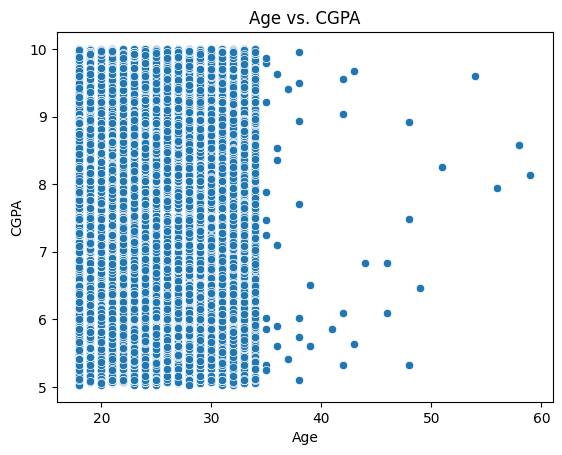

In [32]:
plot_numerical_vs_numerical(data, 'Age', 'CGPA')

### Age vs. Gender

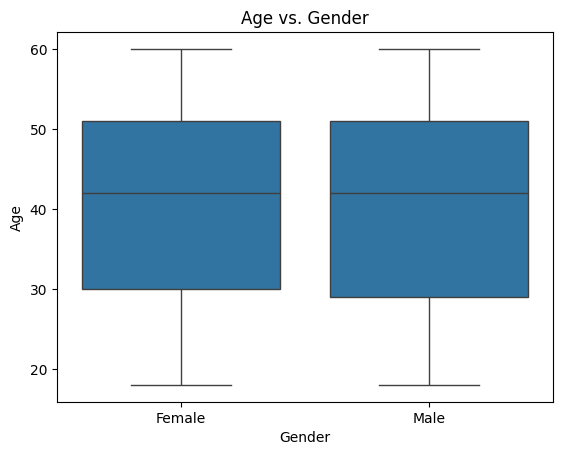

In [33]:
plot_numerical_vs_categorical(data, 'Age', 'Gender')

**Interpretation of results:**
- The age distribution for Females and Males seems relatively similar, with both categories having a similar spread and median age.
- The spread in age for both genders indicates a mix of individuals across different age ranges, with both younger and older individuals present 

### Age vs. City

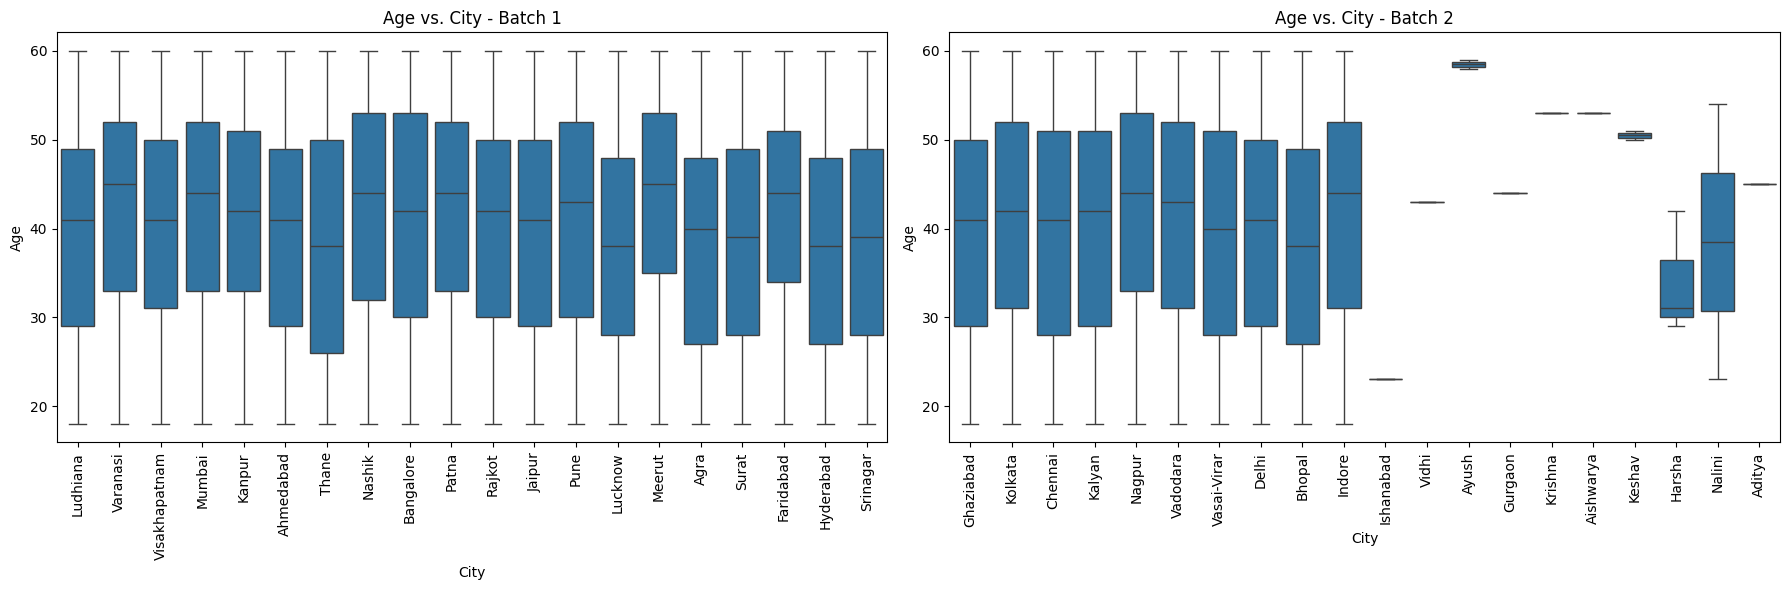

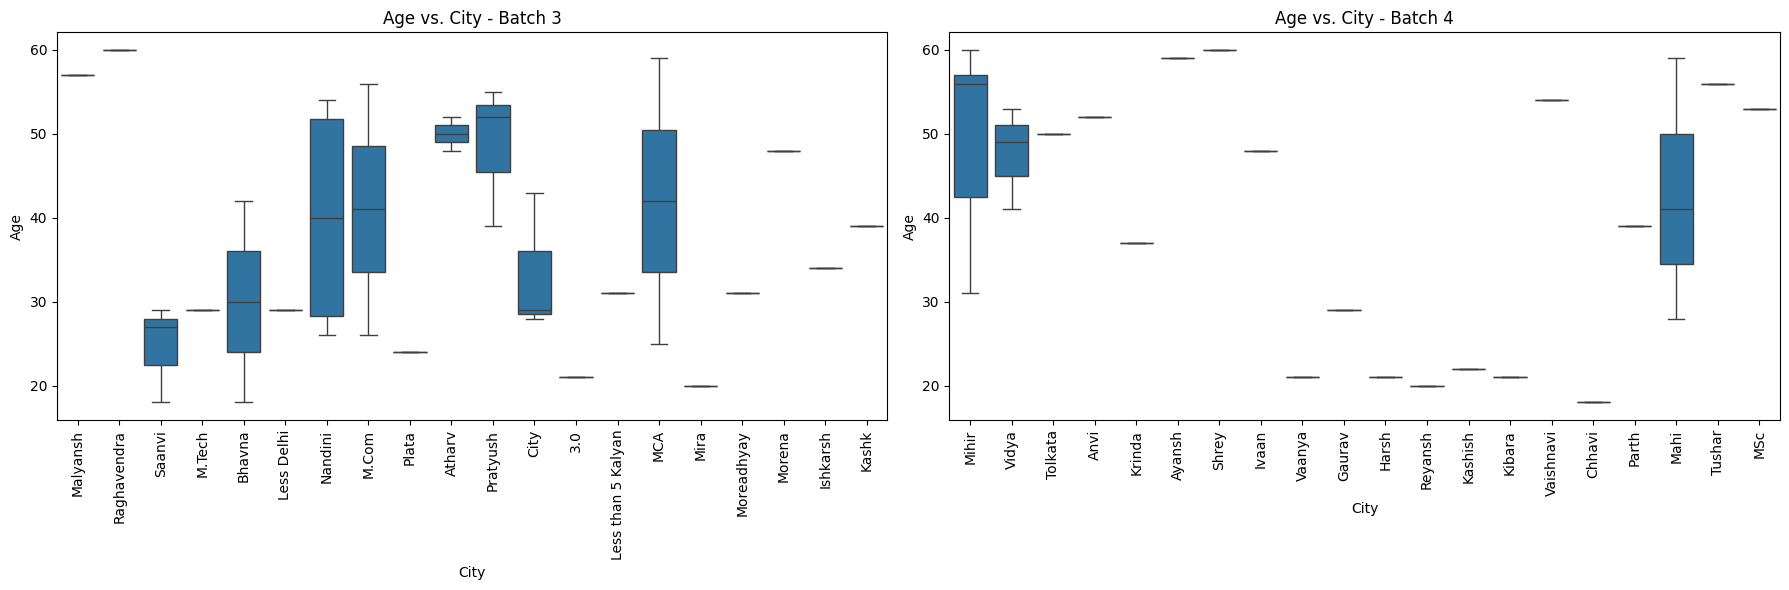

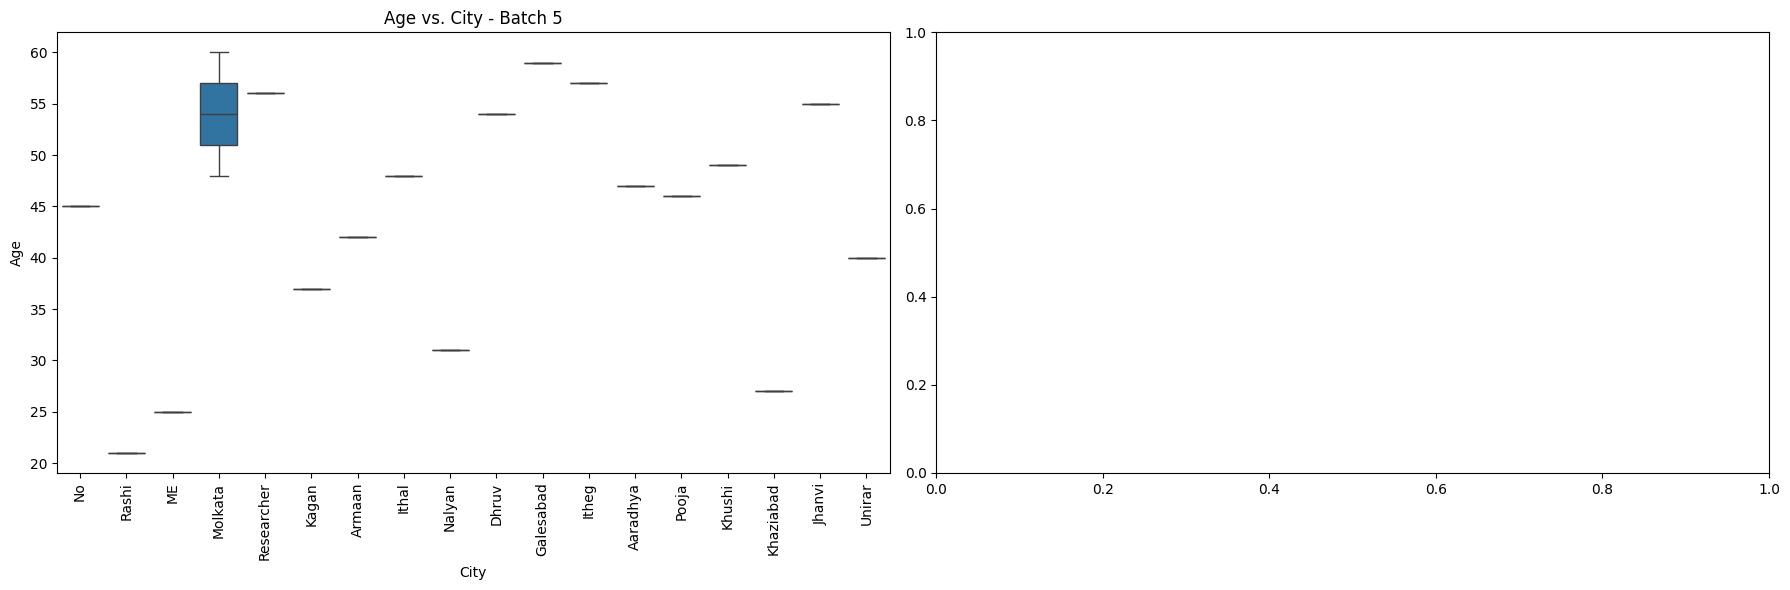

In [34]:
plot_numerical_vs_categorical(data, 'Age', 'City')

**Interpretation of results:**
- The boxplots show that age distributions vary slightly by city, with urban centers like Bangalore and Hyderabad showing a broader age range. However, some cities with limited data show narrow or single-age entries, suggesting potential data representation issues.

### Age vs. Working Professional or Student

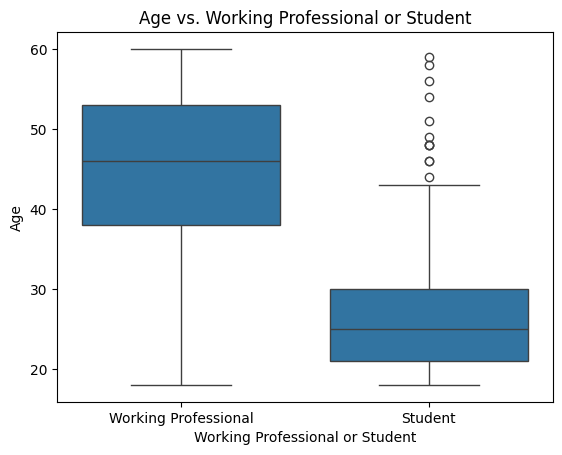

In [35]:
plot_numerical_vs_categorical(data, 'Age', 'Working Professional or Student')

**Interpretation of results:**
- The Working Professionals are significantly older, with a wider spread of ages. This reflects that individuals in this category can range from early career professionals to those in mid-career or even late-career stages.
- Students, on the other hand, are predominantly younger, typically in their 20s, with very few individuals outside this age range. This is typical of a student population, which generally consists of individuals attending undergraduate or graduate programs.
- The presence of older students (above 40 years) as outliers is interesting because it suggests that the dataset includes a subset of non-traditional students who may be pursuing education at a later stage in life. These could include people going back to school for advanced degrees or certifications, or those in specialized programs for adults.
- The Working Professional category is consistent with expectations for professionals in the 40-60 age range, with no outliers. This reflects individuals who are well-established in their careers, and their age distribution is more typical of those at mid-career or late-career stages.

### Age vs. Study Satisfaction

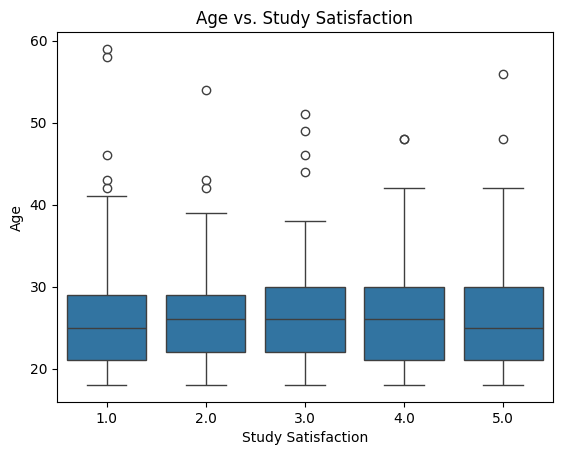

In [36]:
plot_numerical_vs_categorical(data, 'Age', 'Study Satisfaction')

**Interpretation of results:**
- The boxplot reveals that older students (likely non-traditional students) represent outliers at the higher age range across all levels of study satisfaction

### Age vs. Job Satisfaction

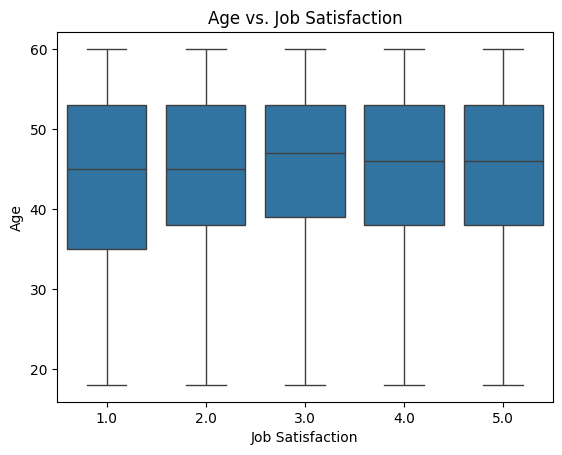

In [37]:
plot_numerical_vs_categorical(data, 'Age', 'Job Satisfaction')

**Interpretation of results:**
- The age distribution appears to be very similar across all job satisfaction levels. The median age is consistent across satisfaction levels, indicating that age does not significantly vary based on job satisfaction.
- Individuals across all job satisfaction levels seem to fall within a similar age range, suggesting that job satisfaction might not be strongly influenced by age in this dataset.
- The boxplots indicate that there is no clear trend where older or younger employees report higher or lower job satisfaction. The consistency in median age and spread suggests that other factors, beyond just age, likely influence job satisfaction more significantly.

### Age vs. Academic Pressure

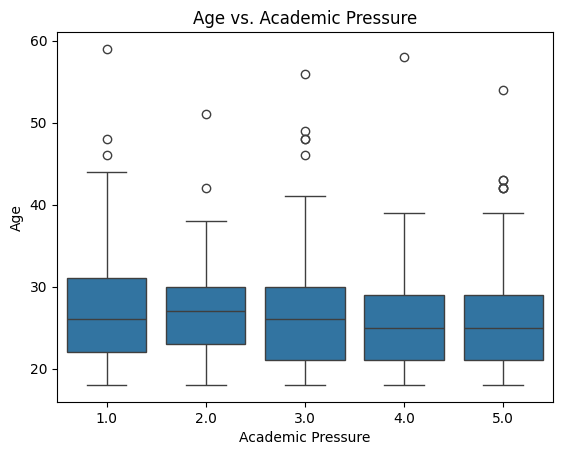

In [38]:
plot_numerical_vs_categorical(data, 'Age', 'Academic Pressure')

**Interpretation of results:**
- The boxplot shows that age does not significantly vary across different levels of academic pressure, with the median age staying consistent. However, older students (those above 35 years) show up as outliers across all levels, indicating that non-traditional students might experience academic pressure differently.

### Age vs. Work Pressure

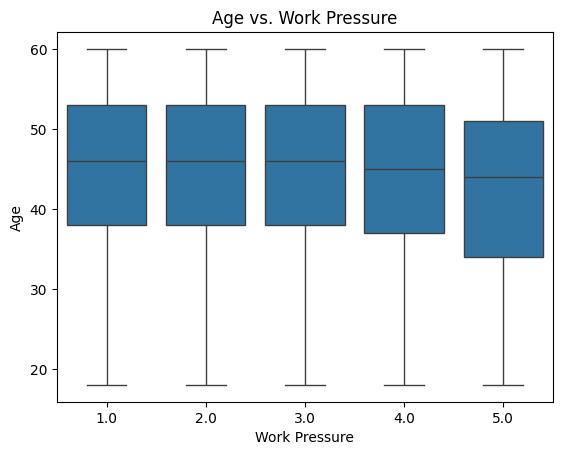

In [39]:
plot_numerical_vs_categorical(data, 'Age', 'Work Pressure')

**Interpretation of results:**
- The boxplot indicates that age does not significantly vary across levels of work pressure, and there are no extreme outliers. This suggests that work pressure is experienced similarly across age groups, and age alone does not have a strong impact on how work pressure is perceived.

### Age vs. Work/Study Hours

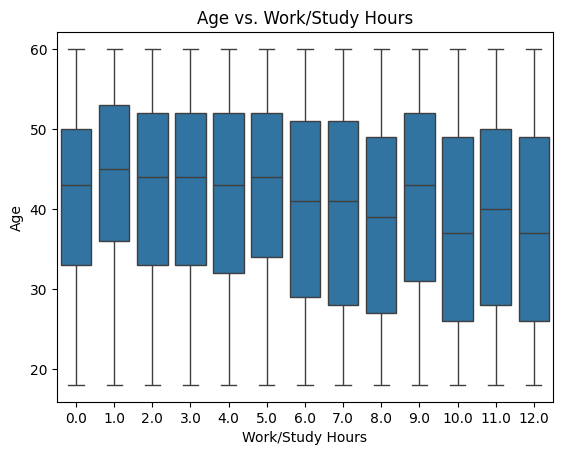

In [40]:
plot_numerical_vs_categorical(data, 'Age', 'Work/Study Hours')

**Interpretation of results:**
- The boxplot reveals that age does not significantly vary across the levels of work/study hours. The median age and age distribution remain consistent, suggesting that work/study hours are not strongly influenced by age

### Age vs. Profession

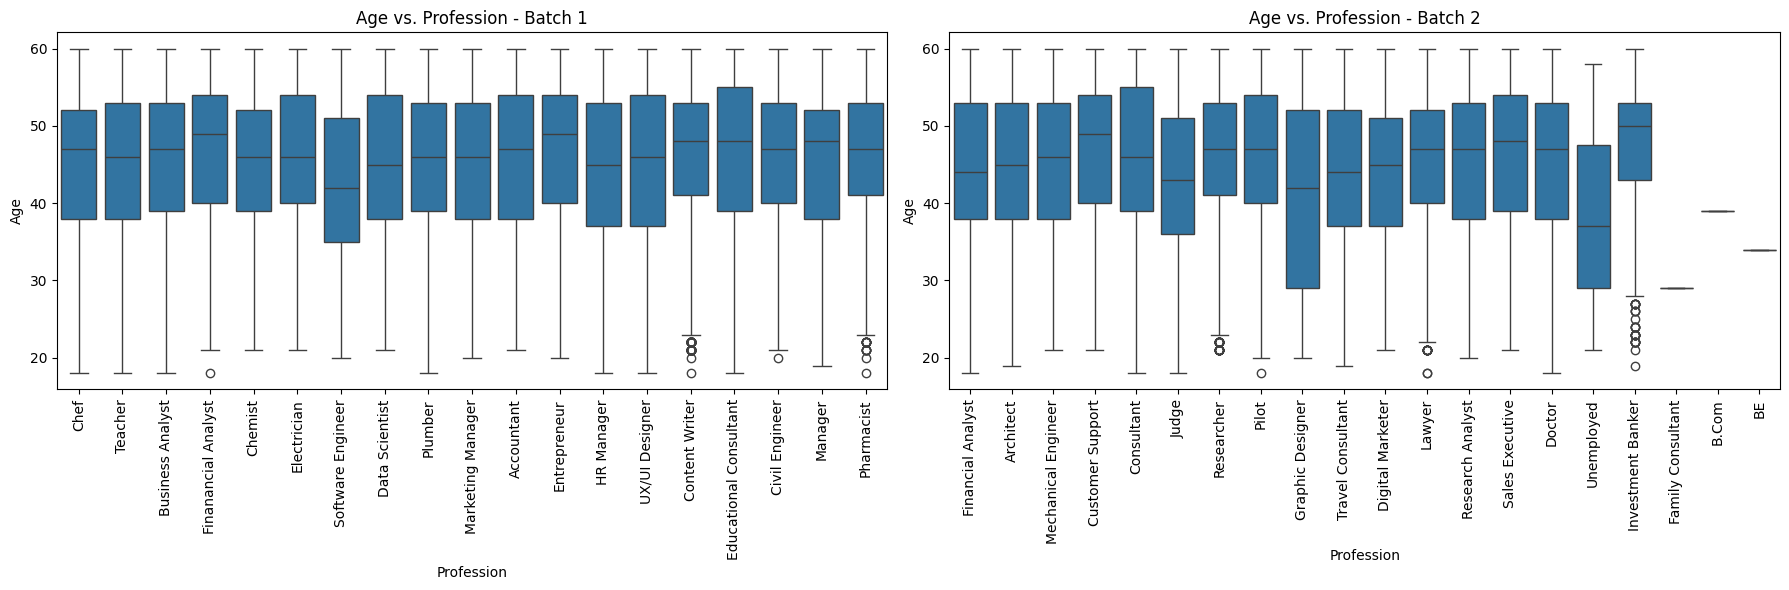

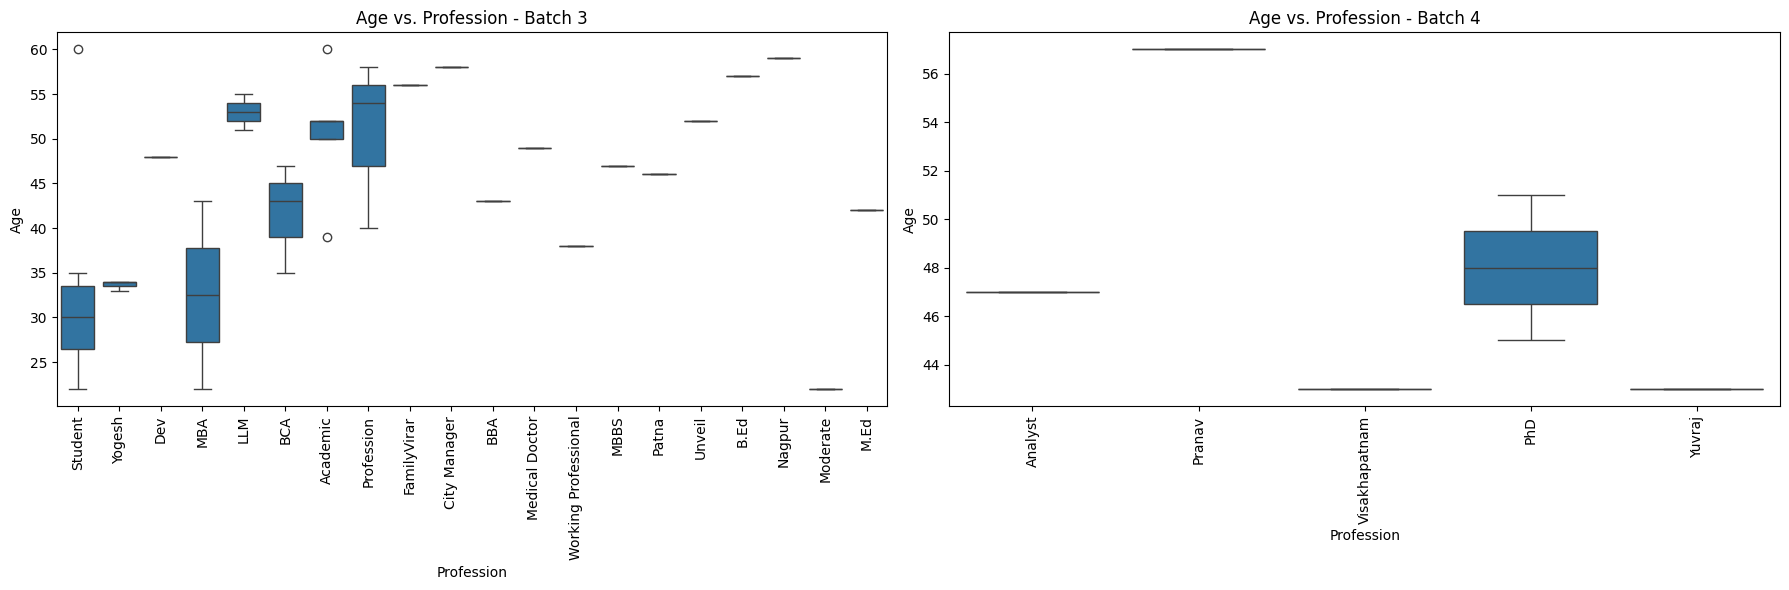

In [41]:
plot_numerical_vs_categorical(data, 'Age', 'Profession')

**Interpretation of results:**
- The boxplot shows that age varies significantly across different professions, with professions like Student having a younger median age, and professions like Doctor, Consultant, and Researcher having older median ages. The wider spread in some professions suggests that these fields attract individuals of various ages, potentially due to career changes, advanced education opportunities, or later career development

### Age vs. Sleep Duration

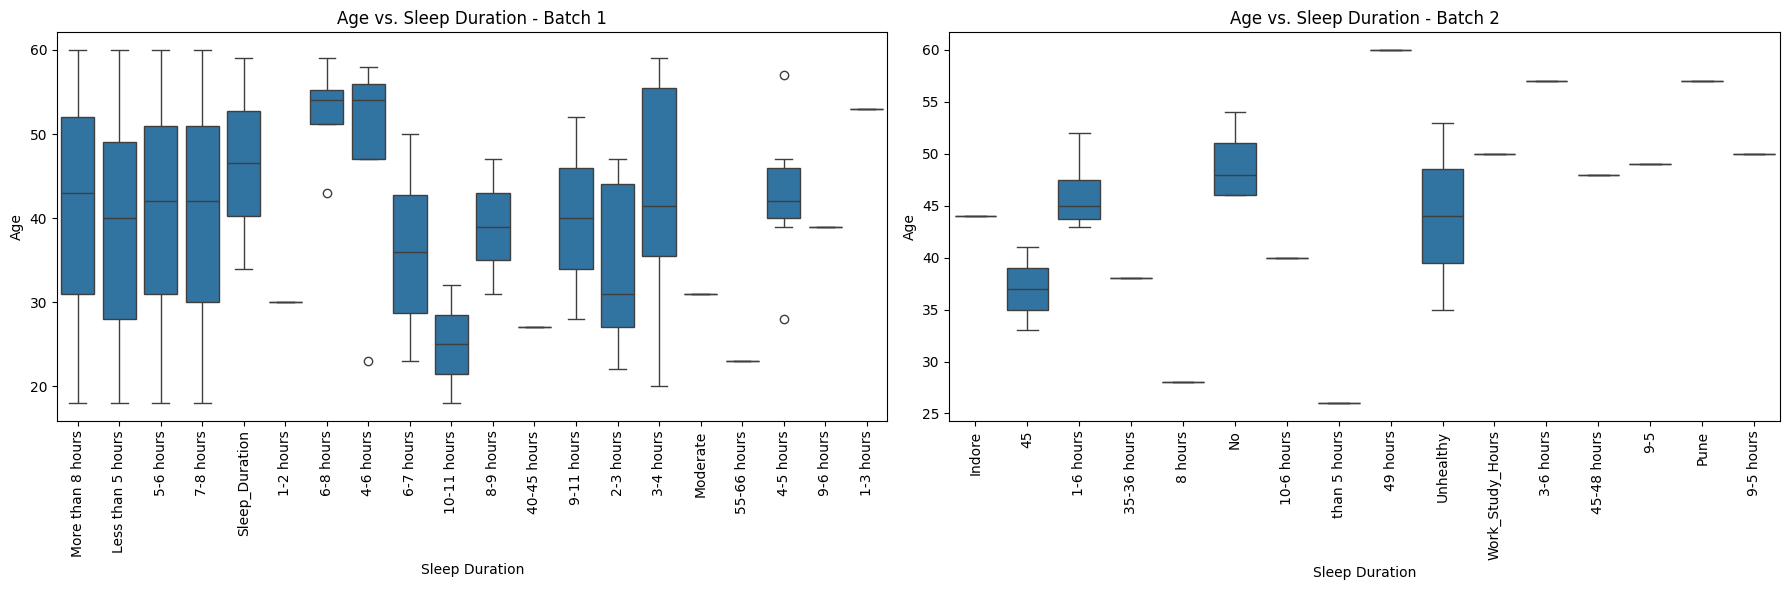

In [42]:
plot_numerical_vs_categorical(data, 'Age', 'Sleep Duration')

**Interpretation of results:**
- The boxplot reveals some variation in age across different sleep durations, with younger individuals generally reporting more sleep (7-8 hours) and older individuals showing some extremes in sleep patterns. The outliers in older age groups could indicate sleep disturbances, which may warrant further exploration regarding health conditions, work stress, or lifestyle factors contributing to poor sleep.

### Age vs. Dietary Habits

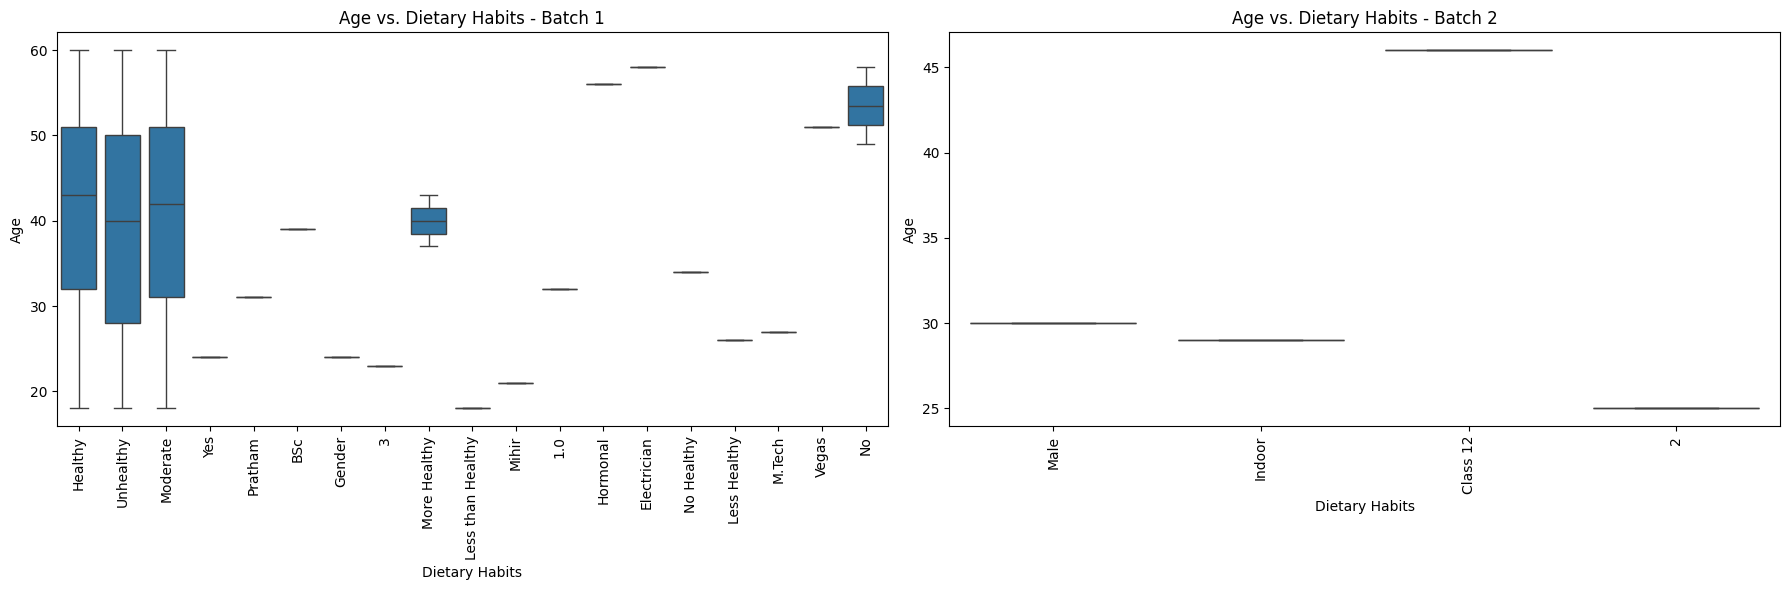

In [43]:
plot_numerical_vs_categorical(data, 'Age', 'Dietary Habits')

**Interpretation of results:**
- The boxplot reveals age distribution across different dietary habit categories. Older individuals generally show healthier or more moderate eating patterns, while younger individuals show more variety in unhealthy dietary habits

### Age vs. Degree

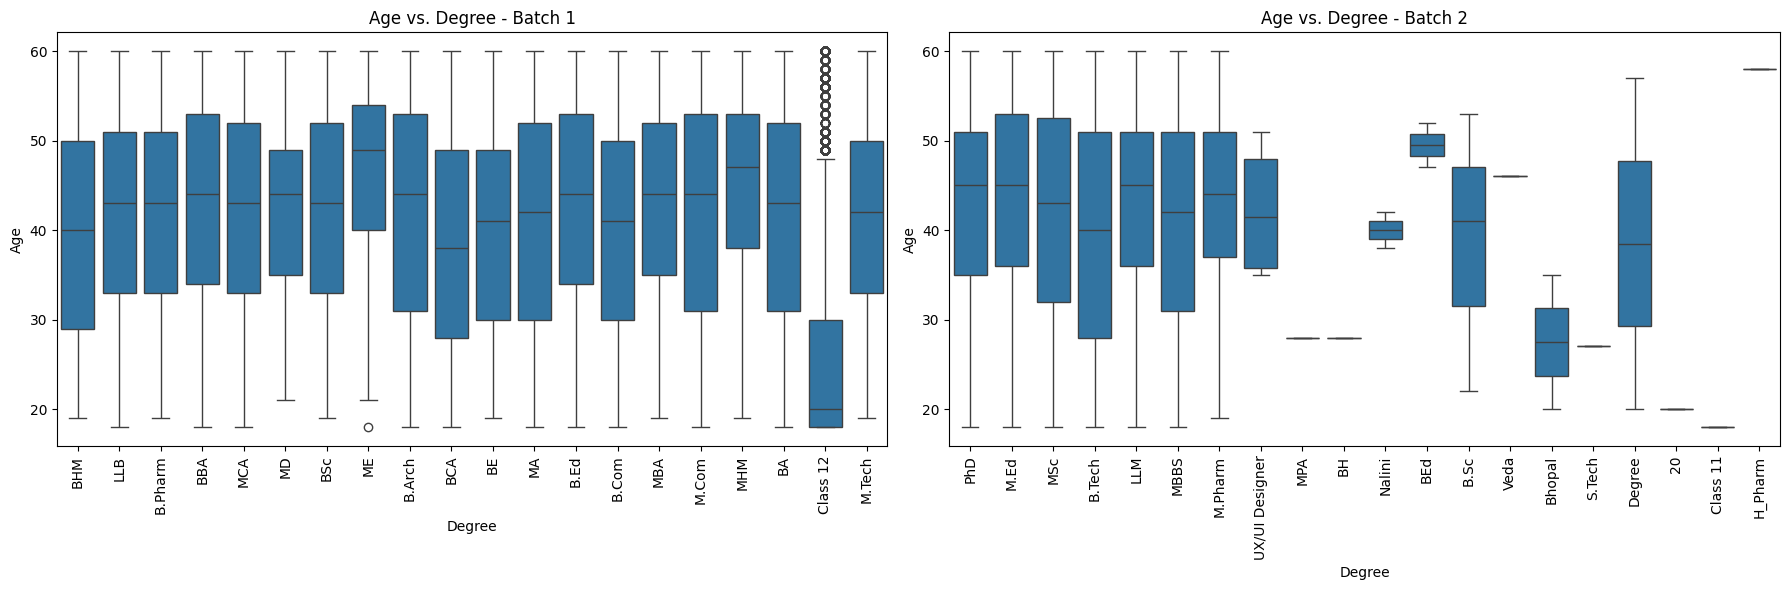

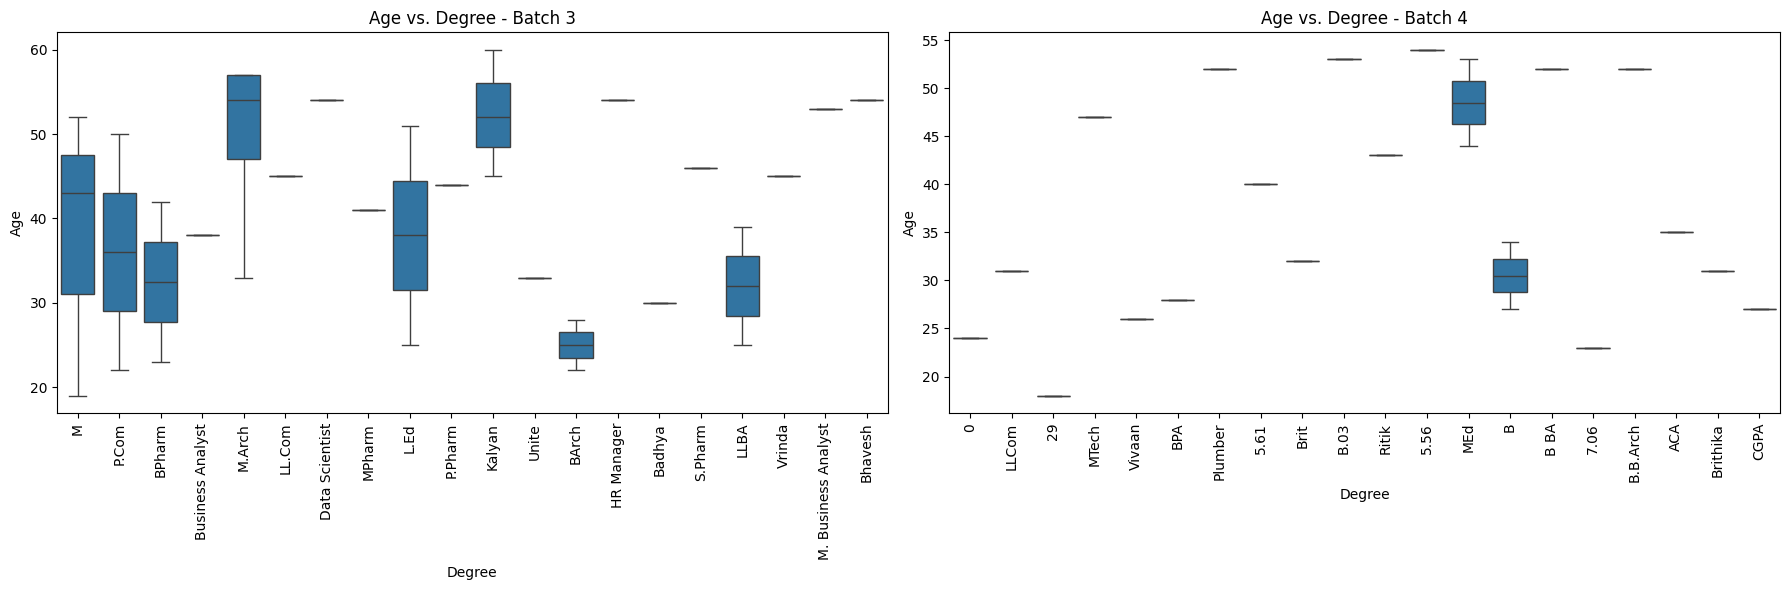

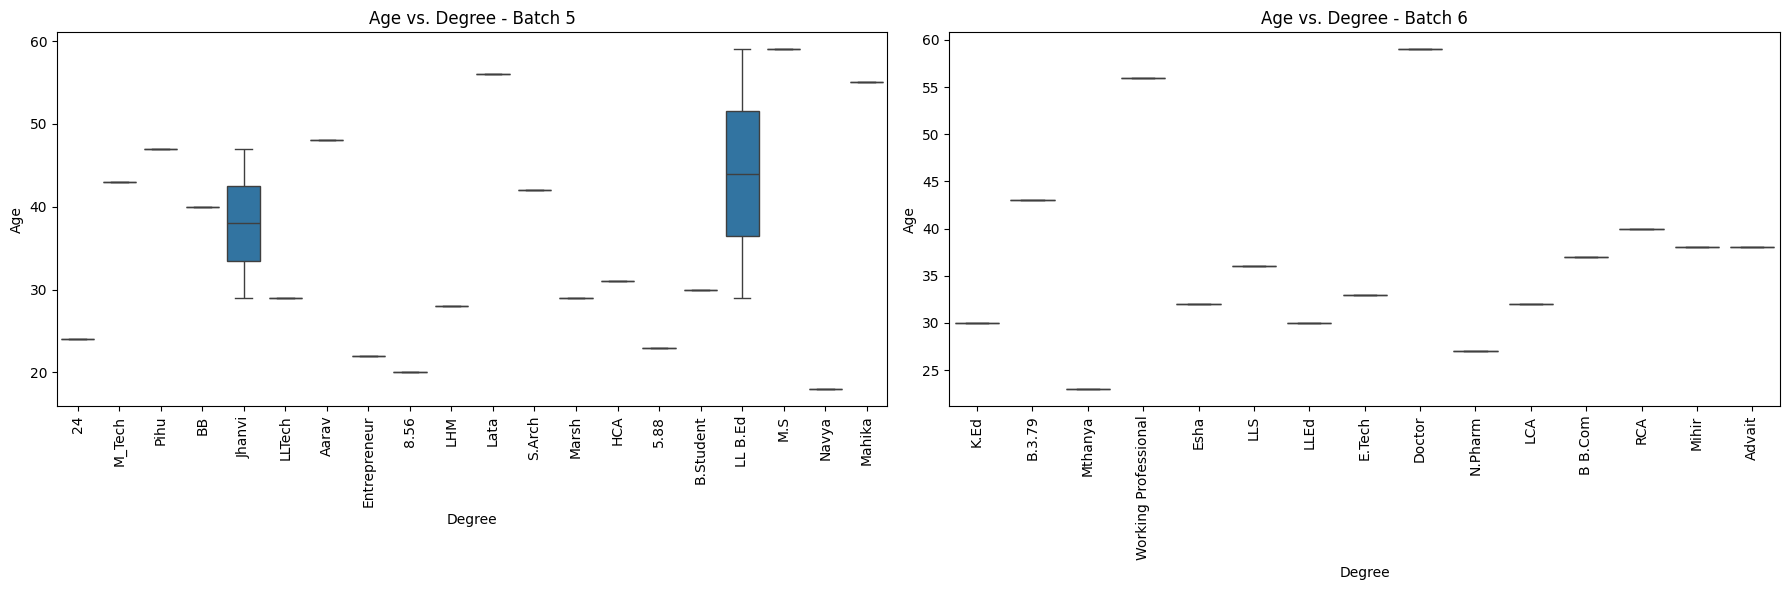

In [44]:
plot_numerical_vs_categorical(data, 'Age', 'Degree')

**Interpretation of results:**
- The age distributions vary significantly across the different degree categories.
- Some degrees, such as M.Tech, PhD, and MBA, show higher median ages (around 40-50 years). This suggests that individuals with these degrees may be older, likely reflecting the professional or advanced nature of these degrees.
- Class 12 have outliers in the older age range. These outliers indicate that there are some individuals who are much older than the typical age for this degrees, which might be indicative of individuals returning to school later in life

### Age vs. Financial Stress

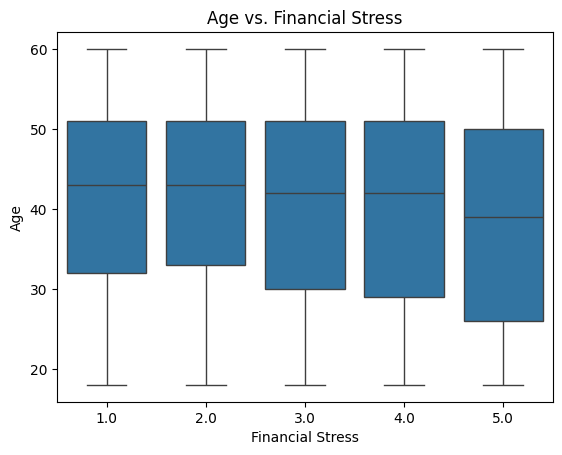

In [45]:
plot_numerical_vs_categorical(data, 'Age', 'Financial Stress')

**Interpretation of results:**
- The age distributions across all financial stress levels appear quite similar. The median age is consistently around 40-50 years for each financial stress level, indicating no significant age difference across stress levels
- There do not appear to be significant outliers within any of the categories, implying that the age distribution is relatively uniform, with no specific age group standing out in terms of financial stress levels
- The lack of a visible trend (e.g., older individuals having more or less financial stress) suggests that age might not strongly correlate with financial stress in this dataset. Financial stress seems to be evenly distributed across age groups

### Age vs. Had Suicidal Thoughts?

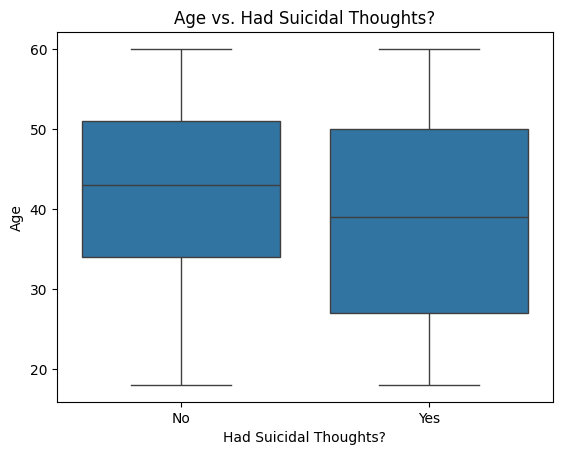

In [46]:
plot_numerical_vs_categorical(data, 'Age', 'Had Suicidal Thoughts?')

**Interpretation of results:**
- The median ages for both groups ("No" and "Yes") are similar, with both distributions centered around the 35 to 45.
- The spread of ages for both groups is fairly similar, showing no significant difference in the age variability between those who have had suicidal thoughts and those who have not.
- There are no few outliers in both categories

### Age vs. Family History of Mental Illness

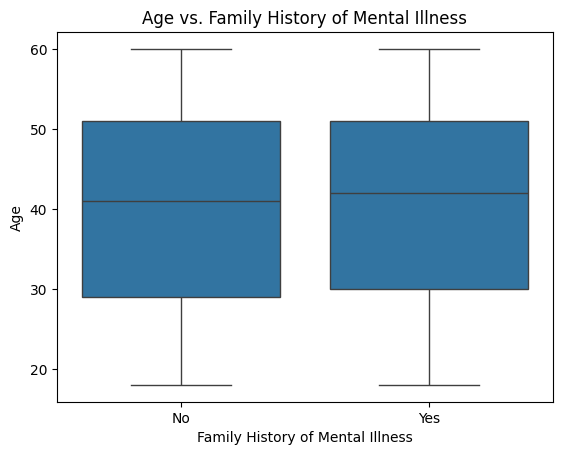

In [47]:
plot_numerical_vs_categorical(data, 'Age', 'Family History of Mental Illness')

**Interpretation of results:**
- The median age is approximately the same for both groups ("No" and "Yes"). The middle of the distribution for both groups lies around 40 years old
- The spread of ages (from the 25th to the 75th percentile) appears to be fairly consistent between the two groups, suggesting similar variability in age

### Age vs. Depression

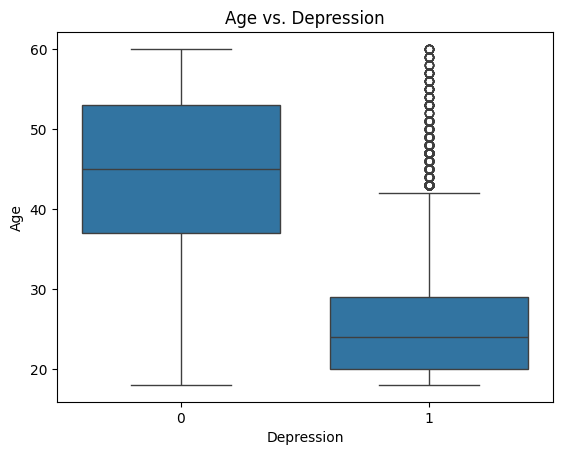

In [48]:
plot_numerical_vs_categorical(data, 'Age', 'Depression')

**Interpretation of results:**
- The data suggests that individuals with depression tend to be younger than those without depression, as shown by the lower median age
- The presence of outliers in the depression group suggests that depression affects people across different ages, though the majority of those with depression appear to be younger